In [1]:
#Extration Manual Medical Devices Equipement 

In [2]:
# import webbrowser

In [3]:
# UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53

# for uf in UF:
#     # generate an URL
#     url = 'http://cnes2.datasus.gov.br/Mod_Ind_Equipamento.asp?VEstado='+str(uf)+'&VMun=&VComp='
#     webbrowser.open(url)

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
%matplotlib inline

In [6]:
def describe_anali(dataframe,dis):
    # val -> value(%)NAN and unique typess
    
    #Types lines
    display(dataframe.head())
    
    lin, col = dataframe.shape
    
    munic = dataframe['Município']
    dataframe.drop(['Município'], axis=1,inplace=True)
    
    dataframe = dataframe.replace('-',0)
    dataframe = dataframe.replace(np.NaN,0)
    #Describ dataframe
    for val in dataframe.columns: 
        dataframe[val] = dataframe[val].astype(int)
#     dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    display(dataframe.describe())
    
    idx = 0
    dataframe.insert(loc=idx, column='Município', value=munic)
    
    #Nan Values 
    quant_NaN_porcent = (dataframe.isna().sum() / dataframe.shape[0])*100
    d = {'Names': quant_NaN_porcent.index.values, 'Porcentagem Faltante': quant_NaN_porcent.values}
    df = pd.DataFrame(data=d)
    display(df)
    
    #If many variables display up value!
    lin, col = dataframe.shape
    if(dis):
        display(df[df['Porcentagem Faltante']>val])
        for val in range(0,col):
            string_val = 'dataframe.'+ str(dataframe.columns[val]) + '.unique()'
            print("Existem {} tipos de {}, nesse dataset como: \n {} \n... \n".format(len(eval(string_val)),dataframe.columns[val], ", " .join(eval(string_val)[0:10].astype(str))))
    
    

In [7]:
def plot_RF(dataframe,label_s,name_y_label):    
    aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
    dataframe["Município"]= aux_colum[1] 
    dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 

    dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

    #Convert int
    dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
    dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

    UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
    UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
#Toy
#     UF = 11,12
#     UF_sig = 'RO','AC'
    state_dict = dict(zip(UF, UF_sig))

    for UF_num, Uf_sig in state_dict.items():
        dataframe_aux = dataframe.copy()
        dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]

        #display(est_hosp5.describe())
        dataframe_aux = dataframe_aux.replace('-',0)
        dataframe_aux = dataframe_aux.replace(np.NaN,0)
        
        values = dataframe_aux.values
        
        values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
        num_hosp = values_np.shape[0]

        #Plot Evolution State
        df2 = pd.DataFrame(values_np, columns= label_s)
        display(df2.describe())
        out = df2.sum()
        
        #Plot data State
        plt.figure(figsize=(20, 10))
        plt.plot(out.index,out.values)
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel(name_y_label,fontsize=23)
        plt.show()
        
        tag = dataframe_aux['Município'].values
        
        #Plot data State for City
        plt.figure(figsize=(20, 40))
        for val in range(0,num_hosp):
            plt.plot(label_s, values_np[val,:],'*', label = str(tag[val]))
        
        plt.plot(out.index,out.values, label = Uf_sig )
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel(name_y_label,fontsize=23)
        plt.legend()
        plt.show()

In [38]:
def new_features_and_plot(dataframe,label_s,name_y_label):
    aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
    dataframe["Município"]= aux_colum[1] 
    dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 

    dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

    #Convert int
    dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
    dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

#     UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
#     UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'

    #Toy
    UF = 11,12
    UF_sig = 'RO','AC'
    state_dict = dict(zip(UF, UF_sig))
    df_Fim_todos = pd.DataFrame()
    unico = 1 #act one time

    for UF_num, Uf_sig in state_dict.items():
        dataframe_aux = dataframe.copy()

        #insert calculates

        dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]
        #display(est_hosp5.describe())
        dataframe_aux = dataframe_aux.replace('-',0)
        dataframe_aux = dataframe_aux.replace(np.NaN,0)

        values = dataframe_aux.values

        values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
        num_hosp = values_np.shape[0]

        #Plot Evolution State
        df2 = pd.DataFrame(values_np, columns= label_s)
        df_sum_anos = df2.copy()
        display(df2.describe())
        out = df2.sum() 
        
        #Plot data State
        plt.figure(figsize=(20, 10))
        plt.plot(out.index,out.values)
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel(name_y_label,fontsize=23)
        plt.show()
        
        tag = dataframe_aux['Município'].values
        
        #Plot data State for City
        plt.figure(figsize=(20, 40))
        for val in range(0,num_hosp):
            plt.plot(label_s, values_np[val,:],'*', label = str(tag[val]))
        
        plt.plot(out.index,out.values, label = Uf_sig )
        plt.title('Estado: %s / Municípios: %s / Sum Total: %s' %(Uf_sig, num_hosp,out.sum()),fontsize=23)
        plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel('Numero de ' +name_y_label,fontsize=23)
        plt.legend()
        plt.show()
        
        #New Features
        val = 0
        ano_seq = 0
        anos = ['2014', '2015', '2016', '2017', '2018']
        df_Fim = dataframe_aux[['Estado','Val_Municipio','Município']]

        for ano in anos:
            nn_anos = new_names[val:val+12]
            val = val+12
            # Sei no estado o quanto tem...
            df_Fim[ano + '_total_'+ name_y_label]= df_sum_anos[nn_anos].sum(axis=1).sum()
            df_Fim[ano + '_por_'+ name_y_label +'_p_total'] = df_sum_anos[nn_anos].sum(axis=1).values
            df_Fim[ano + '_'+ name_y_label +'_por_cento'] = df_Fim[ano + '_por_'+ name_y_label +'_p_total']  / df_Fim[ano + '_total_'+ name_y_label]
#             print(df_Fim.shape)
        df_Fim_todos = pd.concat([df_Fim_todos, df_Fim])
        display(df_Fim_todos)
    return (df_Fim_todos)

## RF

### Leitos de internacao

In [39]:
# data_leitos_internacao = pd.read_csv('../data/RF- Leitos de Internação.csv', sep=';', skiprows=3, encoding='latin1')
# # data_leitos_internacao
# # data_leitos_internacao.values
# # data_leitos_internacao.index
# dis = False
# aux = data_leitos_internacao.copy()
# describe_anali(aux,dis)
# aux = data_leitos_internacao.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de Leitos'
# plot_RF(aux,new_names,name_y_label)


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,61.679245,61.528302,61.452830,61.679245,61.886792,61.811321,61.90566,61.981132,61.264151,61.150943,...,62.358491,62.358491,62.754717,62.943396,62.943396,62.735849,62.113208,63.320755,63.339623,62.056604
std,162.292444,161.238310,161.258102,162.136430,162.173893,162.158642,162.10885,162.124061,161.854891,161.832225,...,165.449515,165.449515,166.411550,166.504148,166.504148,166.498805,163.891106,173.365862,173.369874,164.472632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
50%,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
75%,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.00000,45.000000,45.000000,45.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
max,1174.000000,1166.000000,1166.000000,1172.000000,1172.000000,1172.000000,1172.00000,1172.000000,1173.000000,1173.000000,...,1186.000000,1186.000000,1193.000000,1193.000000,1193.000000,1193.000000,1174.000000,1246.000000,1246.000000,1178.000000


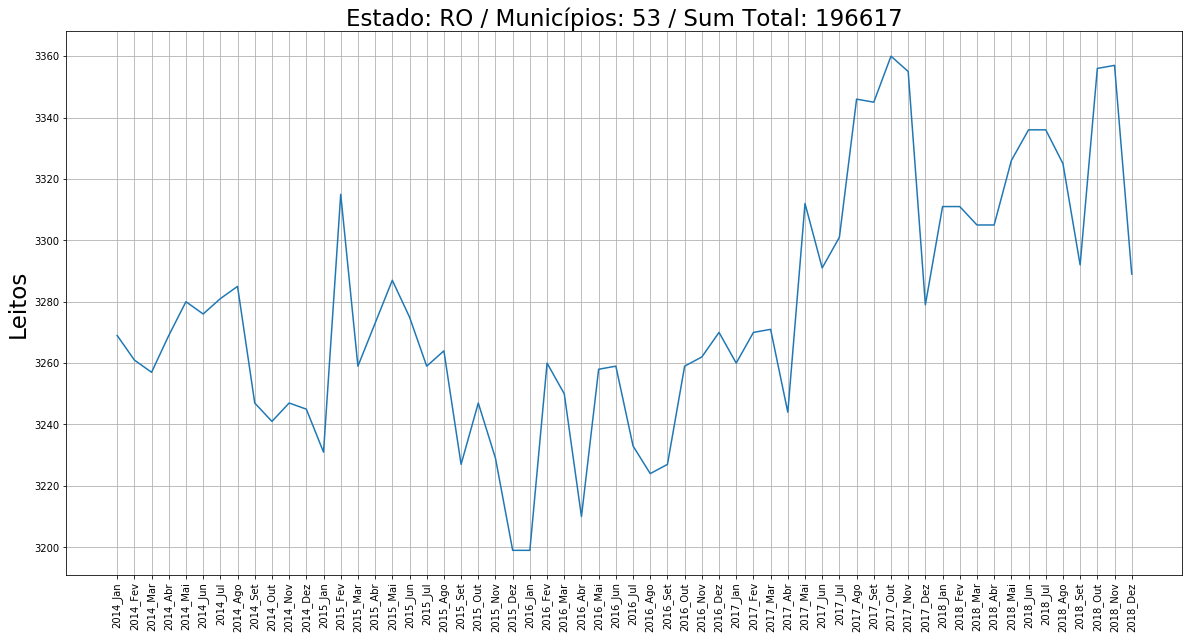

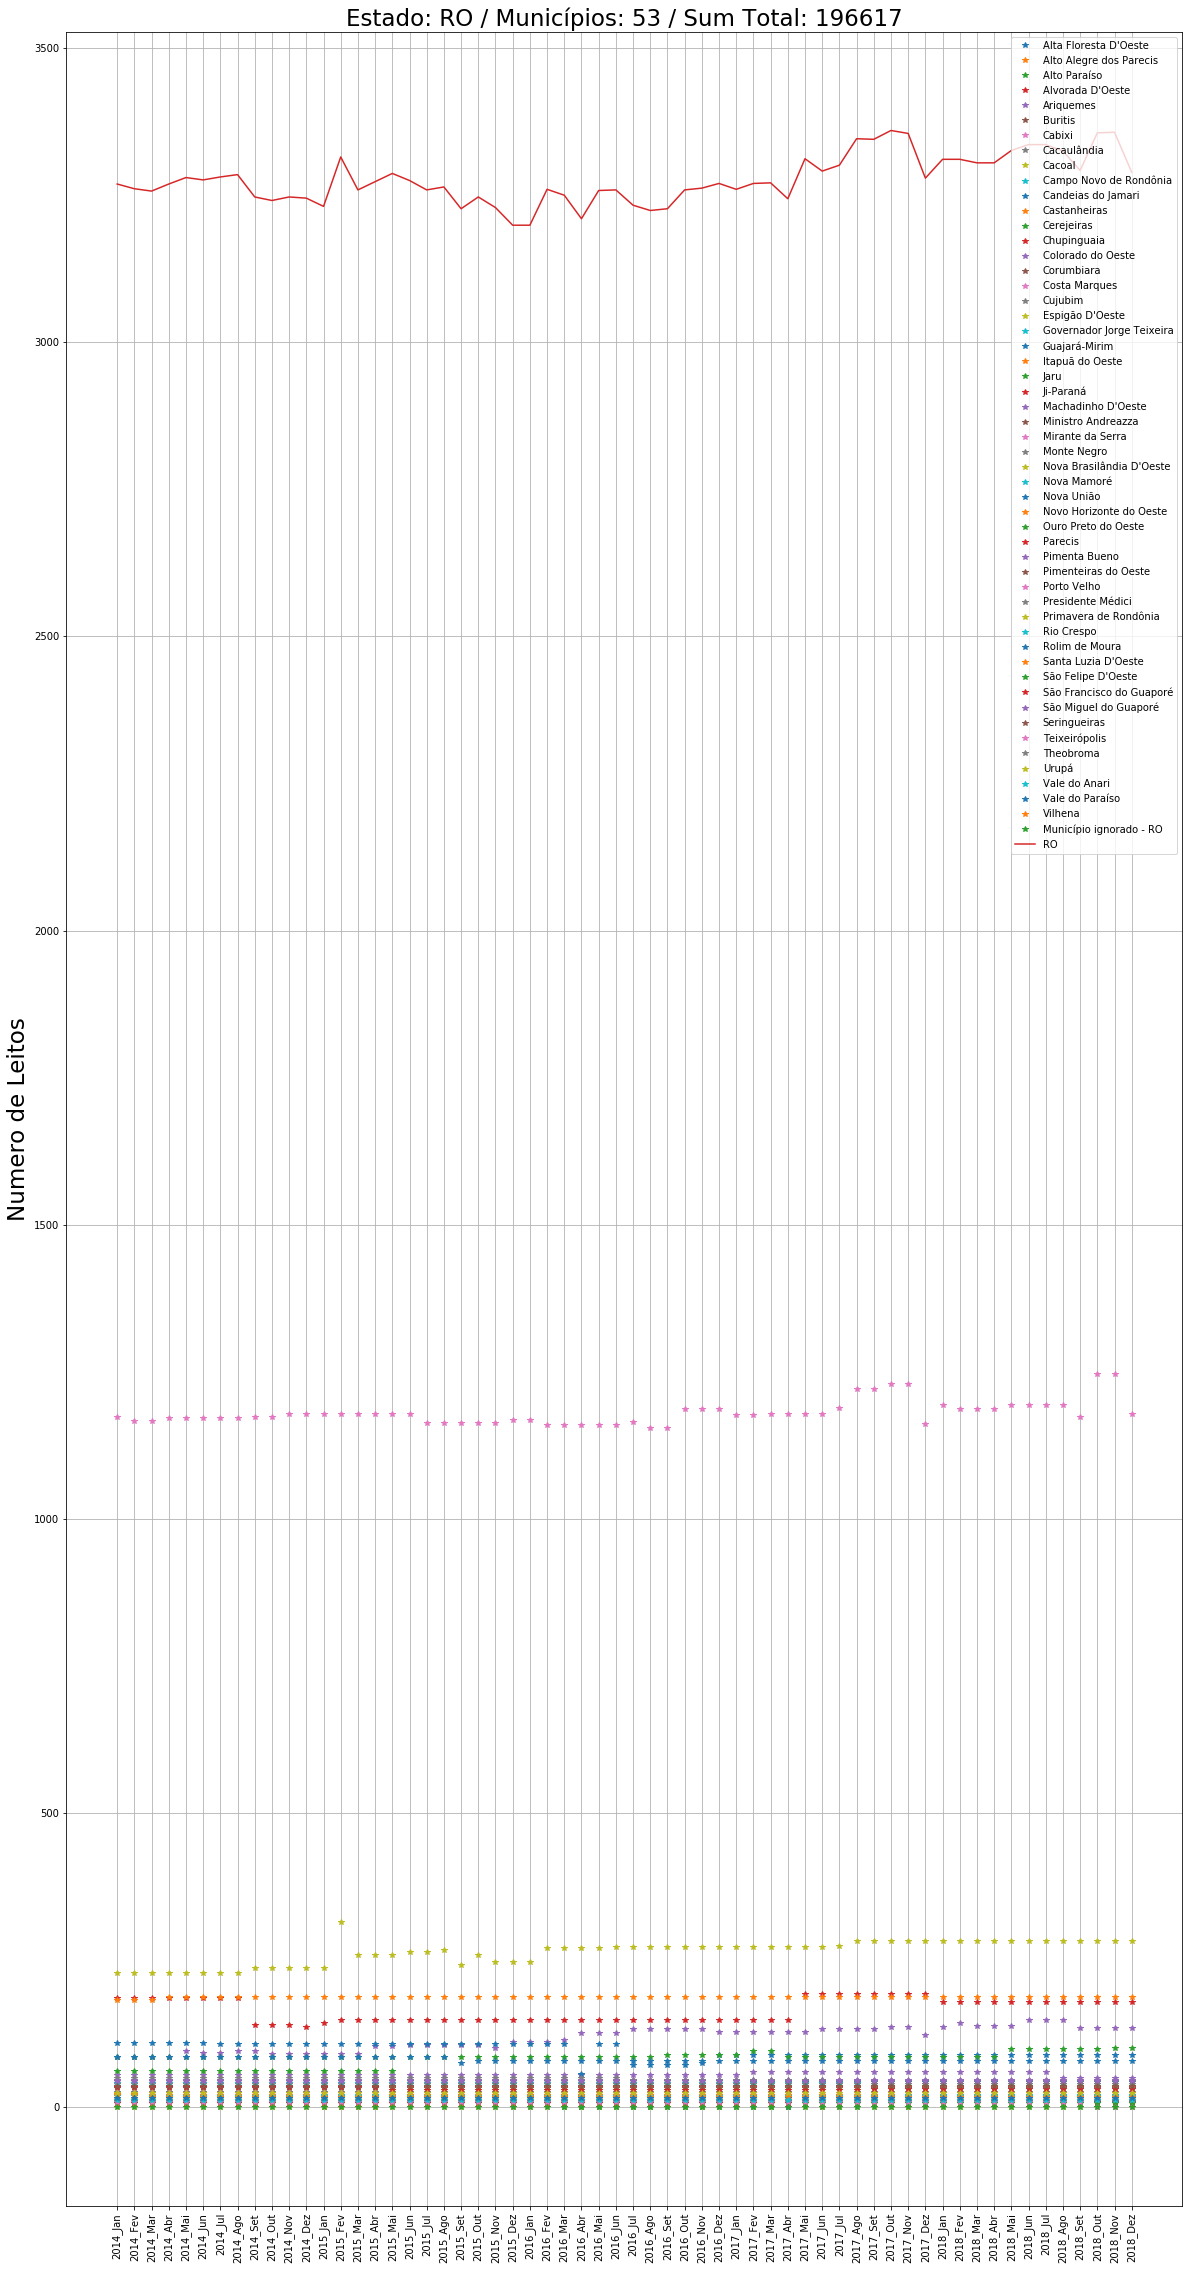

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_Leitos,2014_por_Leitos_p_total,2014_Leitos_por_cento,2015_total_Leitos,2015_por_Leitos_p_total,2015_Leitos_por_cento,2016_total_Leitos,2016_por_Leitos_p_total,2016_Leitos_por_cento,2017_total_Leitos,2017_por_Leitos_p_total,2017_Leitos_por_cento,2018_total_Leitos,2018_por_Leitos_p_total,2018_Leitos_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,39158,540,0.013790,39065,540,0.013823,38911,540,0.013878,39634,518,0.013070,39849,516,0.012949
1,11.0,110037.0,Alto Alegre dos Parecis,39158,192,0.004903,39065,192,0.004915,38911,192,0.004934,39634,192,0.004844,39849,192,0.004818
2,11.0,110040.0,Alto Paraíso,39158,180,0.004597,39065,180,0.004608,38911,180,0.004626,39634,180,0.004542,39849,183,0.004592
3,11.0,110034.0,Alvorada D'Oeste,39158,420,0.010726,39065,420,0.010751,38911,420,0.010794,39634,420,0.010597,39849,420,0.010540
4,11.0,110002.0,Ariquemes,39158,1082,0.027632,39065,1213,0.031051,38911,1506,0.038704,39634,1569,0.039587,39849,1674,0.042009
5,11.0,110045.0,Buritis,39158,384,0.009806,39065,384,0.009830,38911,384,0.009869,39634,384,0.009689,39849,384,0.009636
6,11.0,110003.0,Cabixi,39158,96,0.002452,39065,96,0.002457,38911,96,0.002467,39634,96,0.002422,39849,107,0.002685
7,11.0,110060.0,Cacaulândia,39158,312,0.007968,39065,312,0.007987,38911,312,0.008018,39634,260,0.006560,39849,312,0.007830
8,11.0,110004.0,Cacoal,39158,2768,0.070688,39065,3114,0.079713,38911,3234,0.083113,39634,3319,0.083741,39849,3396,0.085222
9,11.0,110070.0,Campo Novo de Rondônia,39158,228,0.005823,39065,228,0.005836,38911,228,0.005860,39634,228,0.005753,39849,228,0.005722


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000
mean,51.826087,51.478261,52.086957,52.086957,52.173913,52.478261,52.260870,52.217391,53.260870,53.217391,...,56.695652,56.695652,56.695652,56.695652,56.695652,56.826087,56.826087,56.869565,57.00000,56.869565
std,129.615043,127.321308,127.574902,127.574902,127.516007,129.064068,128.066821,128.080570,131.273558,131.074218,...,146.335677,146.335677,146.335677,146.335677,146.335677,146.945461,146.945461,147.148751,147.75871,147.148751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.000000,8.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.50000,11.500000
50%,15.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000
75%,35.500000,34.500000,34.500000,34.500000,34.500000,34.500000,34.500000,34.500000,36.000000,36.000000,...,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.500000,41.50000,41.500000
max,622.000000,611.000000,612.000000,612.000000,611.000000,619.000000,614.000000,614.000000,629.000000,628.000000,...,711.000000,711.000000,711.000000,711.000000,711.000000,714.000000,714.000000,715.000000,718.00000,715.000000


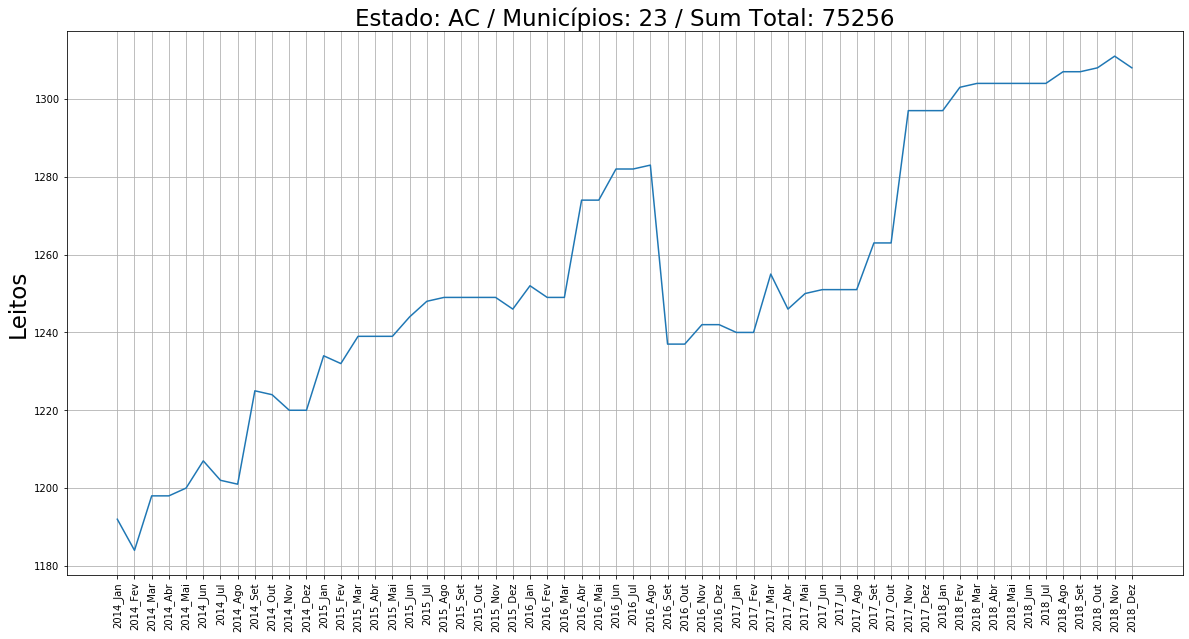

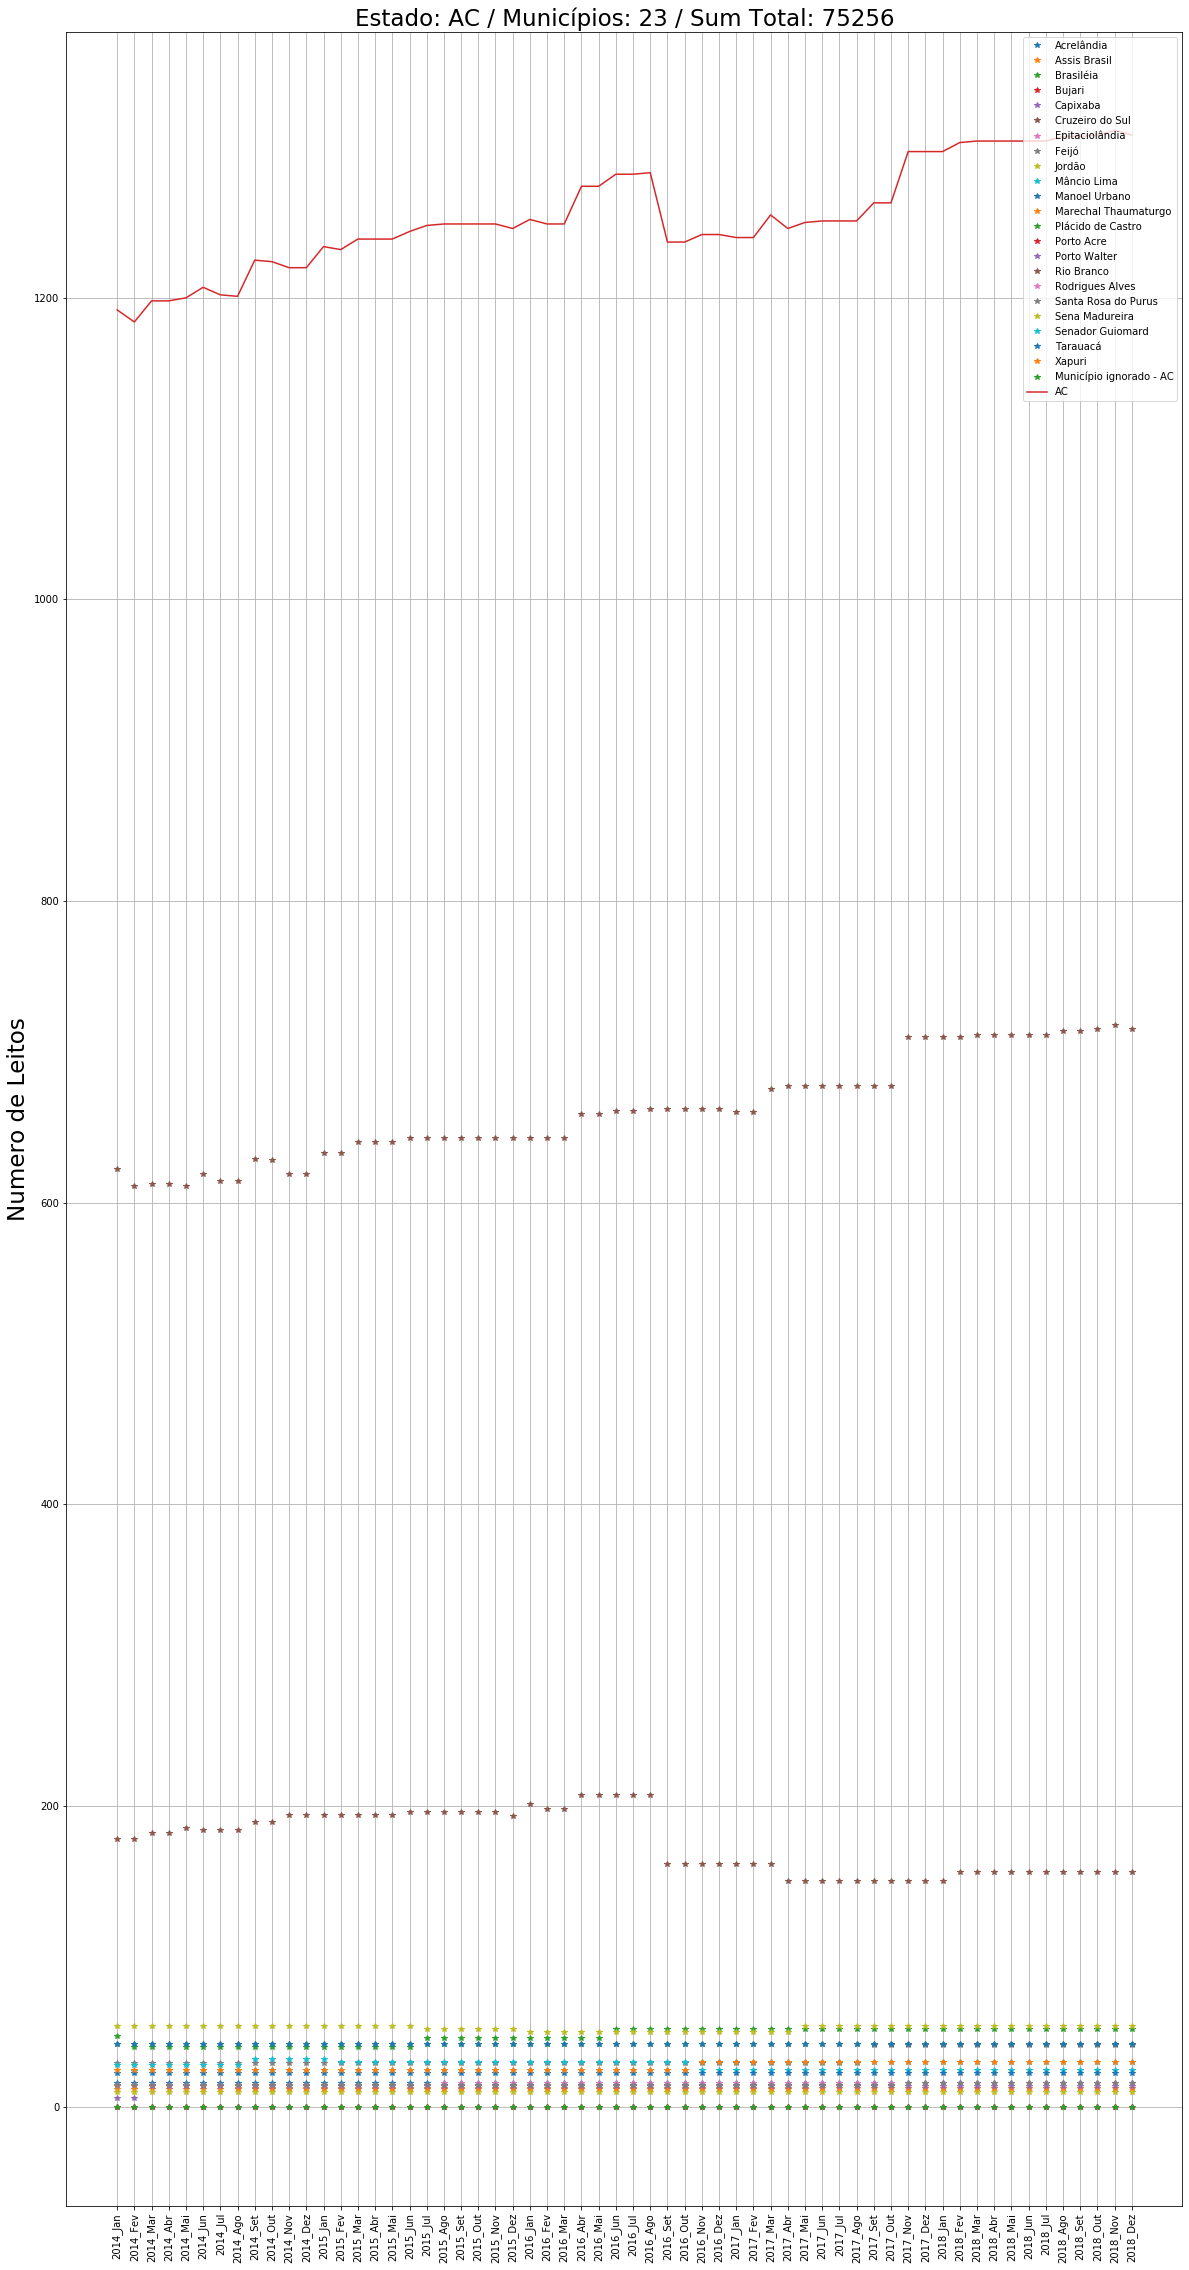

,Estado,Val_Municipio,Município,2014_total_Leitos,2014_por_Leitos_p_total,2014_Leitos_por_cento,2015_total_Leitos,2015_por_Leitos_p_total,2015_Leitos_por_cento,2016_total_Leitos,2016_por_Leitos_p_total,2016_Leitos_por_cento,2017_total_Leitos,2017_por_Leitos_p_total,2017_Leitos_por_cento,2018_total_Leitos,2018_por_Leitos_p_total,2018_Leitos_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,39158,540,0.013790,39065,540,0.013823,38911,540,0.013878,39634,518,0.013070,39849,516,0.012949
1,11.0,110037.0,Alto Alegre dos Parecis,39158,192,0.004903,39065,192,0.004915,38911,192,0.004934,39634,192,0.004844,39849,192,0.004818
2,11.0,110040.0,Alto Paraíso,39158,180,0.004597,39065,180,0.004608,38911,180,0.004626,39634,180,0.004542,39849,183,0.004592
3,11.0,110034.0,Alvorada D'Oeste,39158,420,0.010726,39065,420,0.010751,38911,420,0.010794,39634,420,0.010597,39849,420,0.010540
4,11.0,110002.0,Ariquemes,39158,1082,0.027632,39065,1213,0.031051,38911,1506,0.038704,39634,1569,0.039587,39849,1674,0.042009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,14471,648,0.044779,14917,636,0.042636,15103,600,0.039727,15104,632,0.041843,15661,648,0.041377
72,12.0,120045.0,Senador Guiomard,14471,352,0.024325,14917,362,0.024268,15103,360,0.023836,15104,360,0.023835,15661,360,0.022987
73,12.0,120060.0,Tarauacá,14471,504,0.034828,14917,504,0.033787,15103,504,0.033371,15104,504,0.033369,15661,504,0.032182
74,12.0,120070.0,Xapuri,14471,300,0.020731,14917,300,0.020111,15103,310,0.020526,15104,360,0.023835,15661,360,0.022987


In [40]:
data_leitos_internacao = pd.read_csv('../data/RF- Leitos de Internação.csv', sep=';', skiprows=3, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data_leitos_internacao.copy()
label_s = new_names
name_y_label = 'Leitos'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

In [41]:
# ### Toy para verificar se está tudo certo! INIT FUNCTION
# # def new_features(dataframe,label_s,name_y_label):    
# aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
# dataframe["Município"]= aux_colum[1] 
# dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 

# dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

# #Convert int
# dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
# dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

# UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
# UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
    
# #Toy
# # UF = 11,12
# # UF_sig = 'RO','AC'
# state_dict = dict(zip(UF, UF_sig))
# df_Fim_todos = pd.DataFrame()
# unico = 1 #act one time

# for UF_num, Uf_sig in state_dict.items():
#     dataframe_aux = dataframe.copy()
    
#     #insert calculates
    
#     dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]
#     #display(est_hosp5.describe())
#     dataframe_aux = dataframe_aux.replace('-',0)
#     dataframe_aux = dataframe_aux.replace(np.NaN,0)
        
#     values = dataframe_aux.values
        
#     values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
#     num_hosp = values_np.shape[0]

#     #Plot Evolution State
#     df2 = pd.DataFrame(values_np, columns= label_s)
#     display(df2.describe())
    
#     df_sum_anos = df2.copy()
    
#     val = 0
#     ano_seq = 0
#     anos = ['2014', '2015', '2016', '2017', '2018']
#     df_Fim = dataframe_aux[['Estado','Val_Municipio','Município']]
    
#     for ano in anos:
#         nn_anos = new_names[val:val+12]
#         val = val+12
#         # Sei no estado o quanto tem...
#         df_Fim[ano + '_total']= df_sum_anos[nn_anos].sum(axis=1).sum()
#         df_Fim[ano + '_por_municipio_p_total'] = df_sum_anos[nn_anos].sum(axis=1).values
#         df_Fim[ano + '_por_municipio_por_cento'] = df_Fim[ano + '_por_municipio_p_total']  / df_Fim[ano + '_total']
#         print(df_Fim.shape)
#     df_Fim_todos = pd.concat([df_Fim_todos, df_Fim])

### RF - Mamografos

In [42]:
# data_mamografos = pd.read_csv('../data/RF- Mamógrafos.csv', sep=';', skiprows=4, encoding='latin1')
# dis = False
# aux = data_mamografos.copy()
# describe_anali(aux,dis)
# aux = data_mamografos.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de Mamógrafos'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.207547,0.207547,0.207547,0.207547,0.188679,0.169811,0.169811,0.169811,0.169811,0.169811,...,0.207547,0.207547,0.207547,0.226415,0.226415,0.226415,0.226415,0.207547,0.226415,0.264151
std,0.884884,0.884884,0.884884,0.884884,0.760986,0.726844,0.726844,0.726844,0.726844,0.726844,...,0.884884,0.884884,0.884884,0.891013,0.891013,0.891013,0.891013,0.793204,0.891013,1.112014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,7.000000


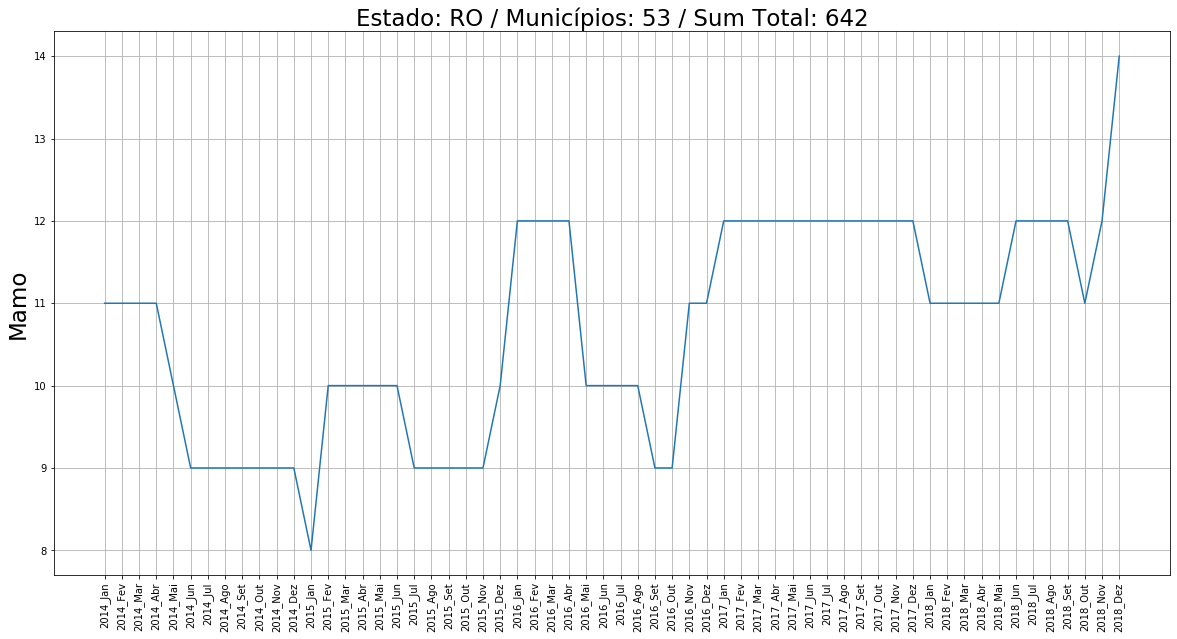

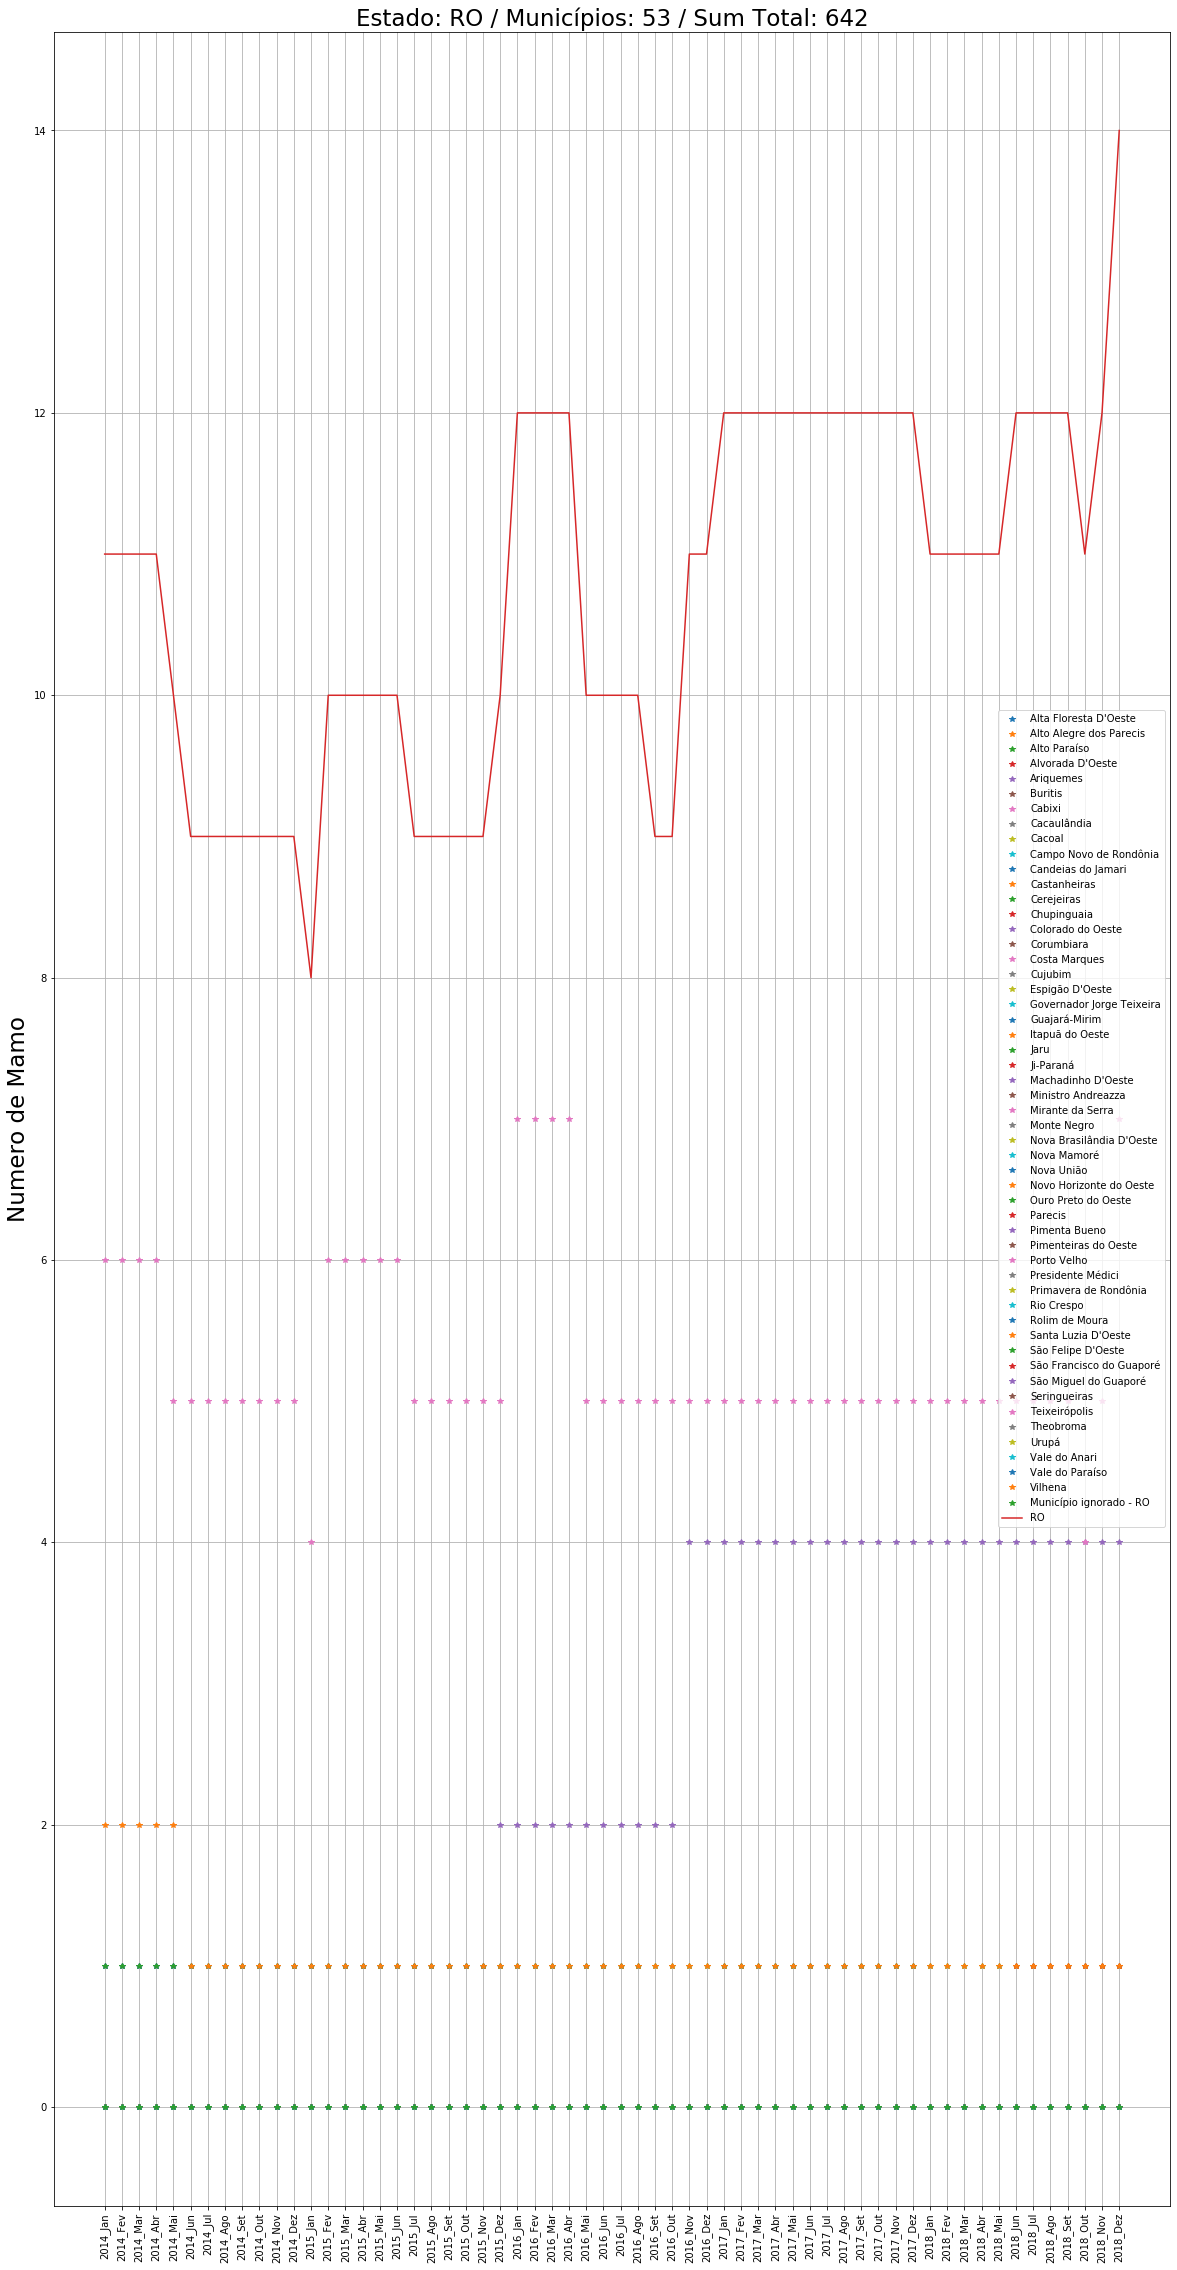

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_Mamo,2014_por_Mamo_p_total,2014_Mamo_por_cento,2015_total_Mamo,2015_por_Mamo_p_total,2015_Mamo_por_cento,2016_total_Mamo,2016_por_Mamo_p_total,2016_Mamo_por_cento,2017_total_Mamo,2017_por_Mamo_p_total,2017_Mamo_por_cento,2018_total_Mamo,2018_por_Mamo_p_total,2018_Mamo_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
2,11.0,110040.0,Alto Paraíso,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
4,11.0,110002.0,Ariquemes,117,12,0.102564,113,13,0.115044,128,28,0.21875,144,48,0.333333,140,48,0.342857
5,11.0,110045.0,Buritis,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
6,11.0,110003.0,Cabixi,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
7,11.0,110060.0,Cacaulândia,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
8,11.0,110004.0,Cacoal,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
9,11.0,110070.0,Campo Novo de Rondônia,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,0.173913,...,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435
std,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,0.650327,...,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


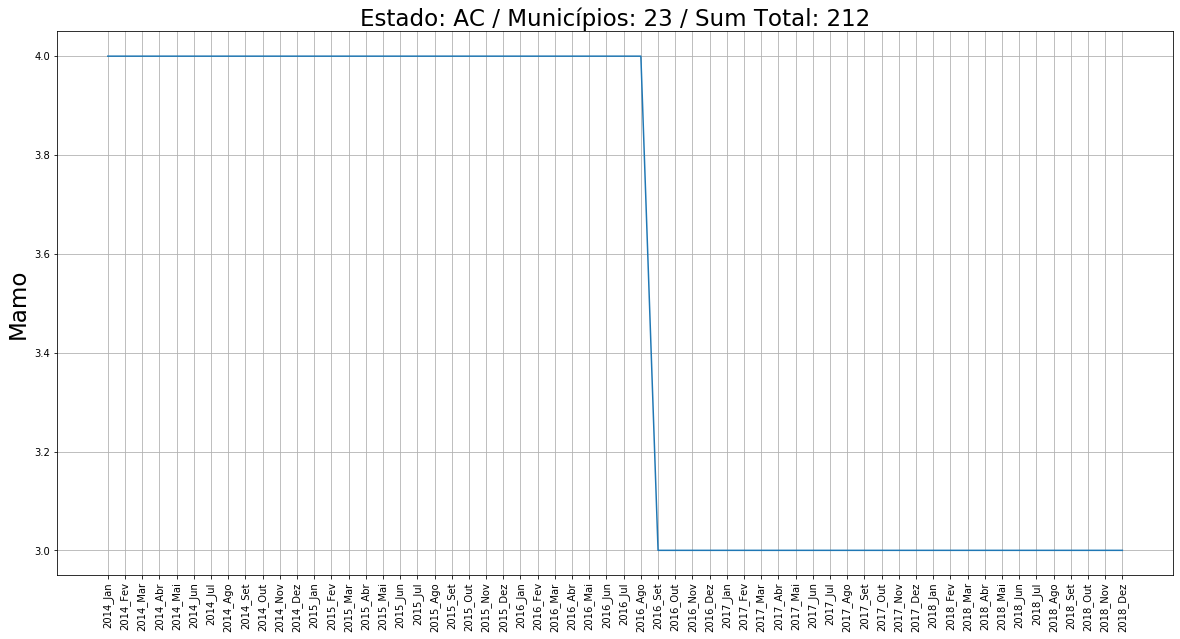

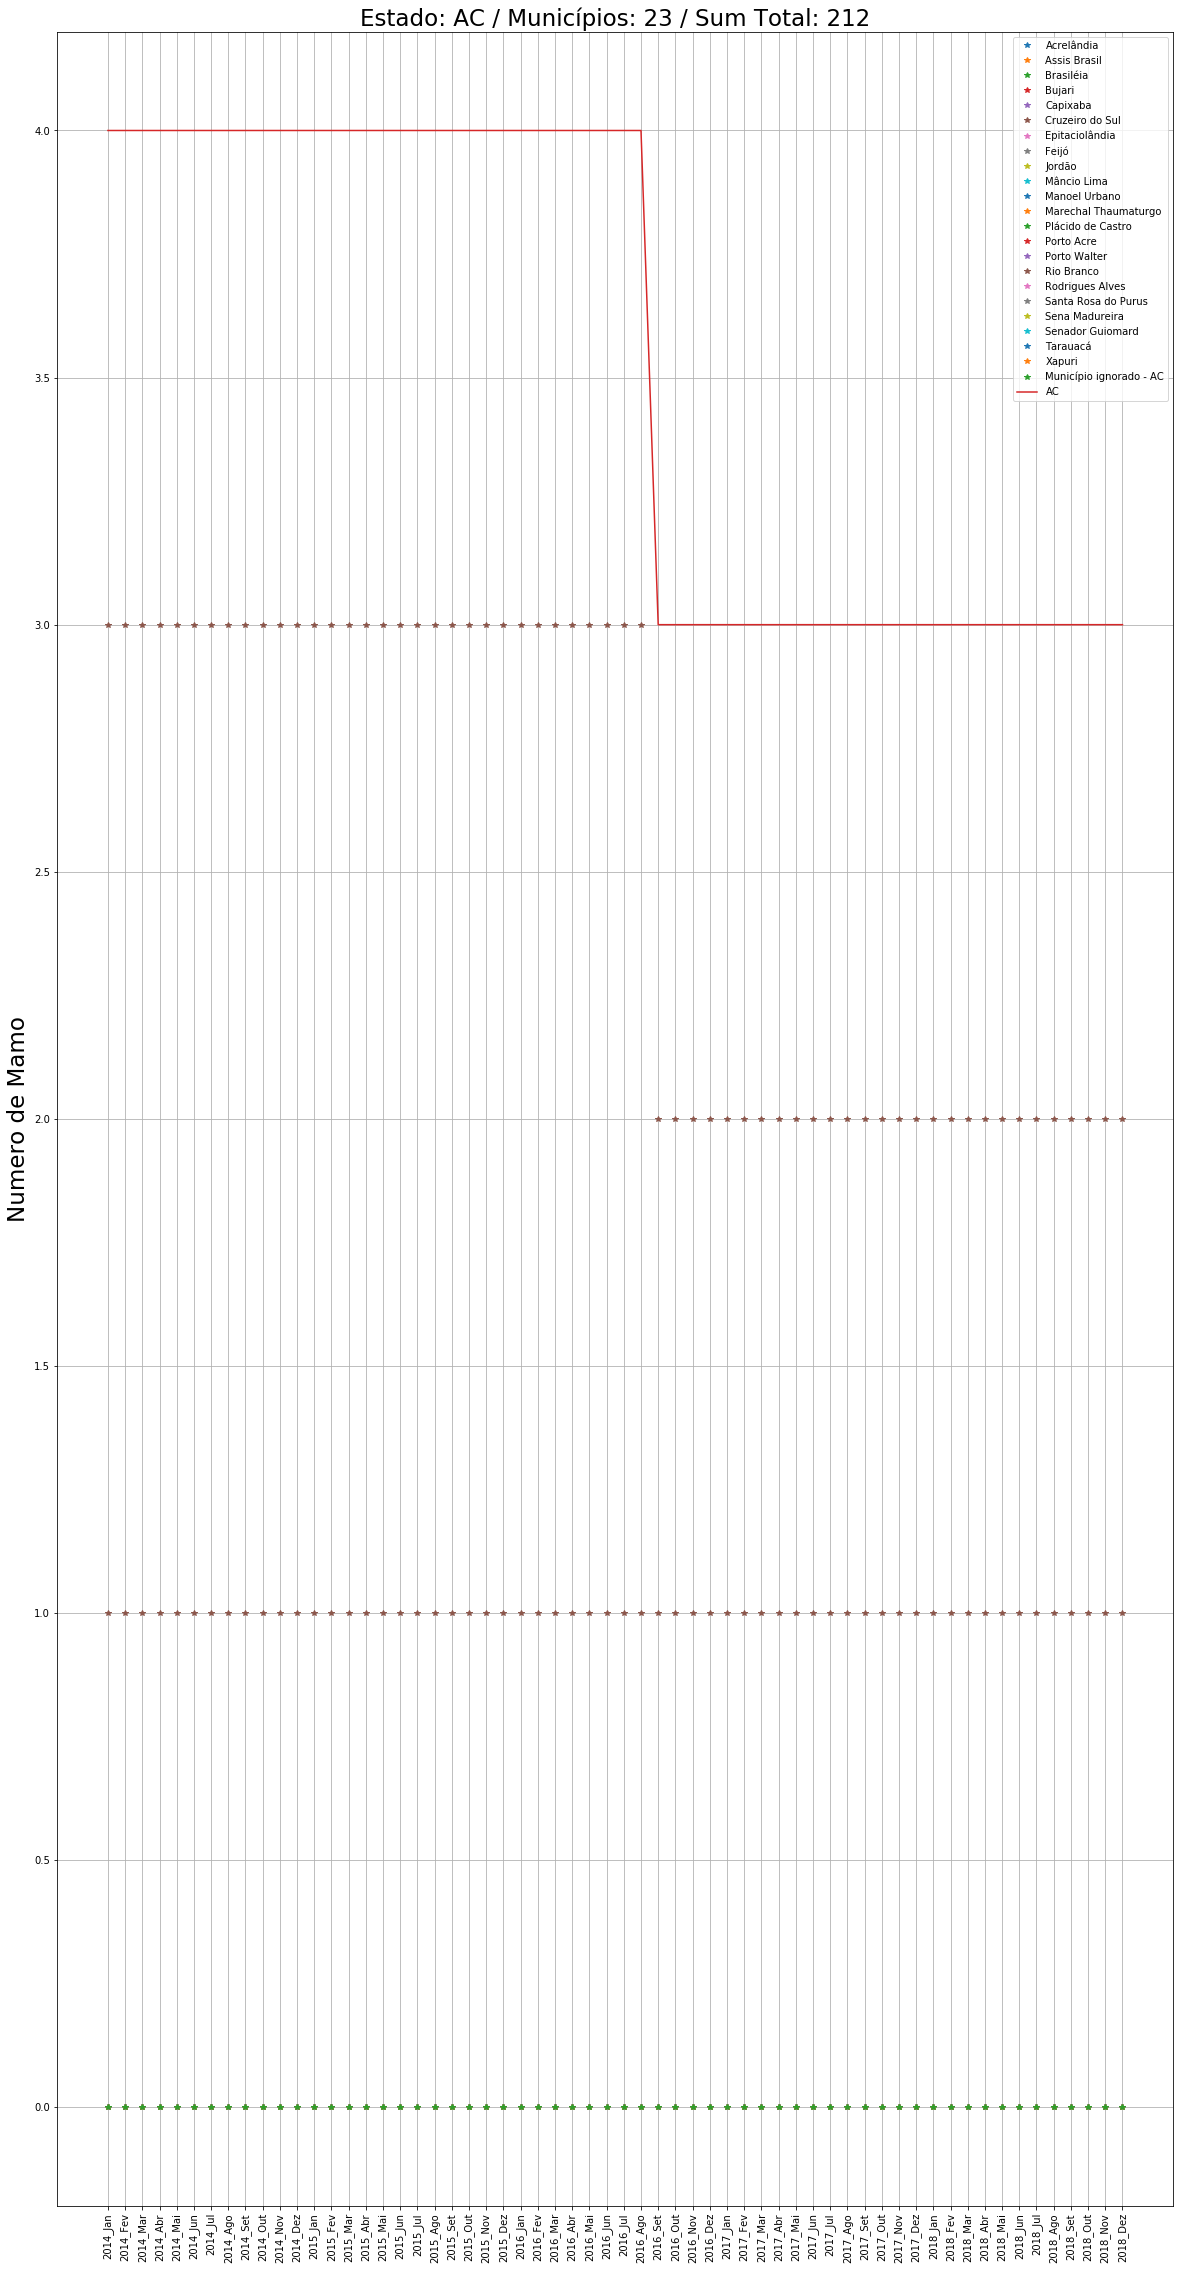

,Estado,Val_Municipio,Município,2014_total_Mamo,2014_por_Mamo_p_total,2014_Mamo_por_cento,2015_total_Mamo,2015_por_Mamo_p_total,2015_Mamo_por_cento,2016_total_Mamo,2016_por_Mamo_p_total,2016_Mamo_por_cento,2017_total_Mamo,2017_por_Mamo_p_total,2017_Mamo_por_cento,2018_total_Mamo,2018_por_Mamo_p_total,2018_Mamo_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
2,11.0,110040.0,Alto Paraíso,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,117,0,0.000000,113,0,0.000000,128,0,0.00000,144,0,0.000000,140,0,0.000000
4,11.0,110002.0,Ariquemes,117,12,0.102564,113,13,0.115044,128,28,0.21875,144,48,0.333333,140,48,0.342857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,48,0,0.000000,48,0,0.000000,44,0,0.00000,36,0,0.000000,36,0,0.000000
72,12.0,120045.0,Senador Guiomard,48,0,0.000000,48,0,0.000000,44,0,0.00000,36,0,0.000000,36,0,0.000000
73,12.0,120060.0,Tarauacá,48,0,0.000000,48,0,0.000000,44,0,0.00000,36,0,0.000000,36,0,0.000000
74,12.0,120070.0,Xapuri,48,0,0.000000,48,0,0.000000,44,0,0.00000,36,0,0.000000,36,0,0.000000


In [44]:
data_mamografos = pd.read_csv('../data/RF- Mamógrafos.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data_mamografos.copy()
label_s = new_names
name_y_label = 'Mamo'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### RF - Raios X.csv

In [ ]:
# data_raiox = pd.read_csv('../data/RF- Raios X.csv', sep=';', skiprows=4, encoding='latin1')
# data_raiox.columns
# data_raiox.index
# dis = False
# aux = data_raiox.copy()
# describe_anali(aux,dis)
# aux = data_mamografos.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de Raio-X'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2.377358,2.358491,2.358491,2.377358,2.358491,2.339623,2.339623,2.377358,2.377358,2.377358,...,2.547170,2.566038,2.490566,2.490566,2.547170,2.547170,2.566038,2.490566,2.452830,2.716981
std,5.623530,5.495083,5.495083,5.516501,5.505572,5.512027,5.512027,5.661022,5.547787,5.547787,...,6.068728,6.197113,5.927844,5.927844,6.314105,6.443739,6.464428,5.950509,5.953558,7.525284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,40.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,40.000000,39.000000,39.000000,...,43.000000,44.000000,42.000000,42.000000,45.000000,46.000000,46.000000,42.000000,42.000000,54.000000


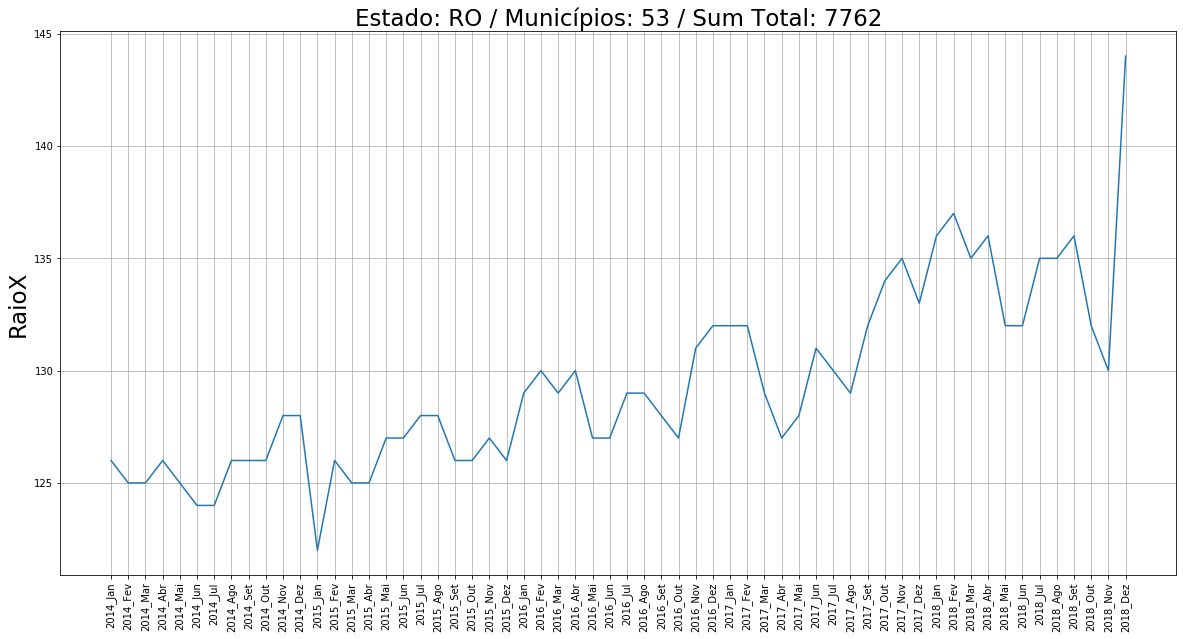

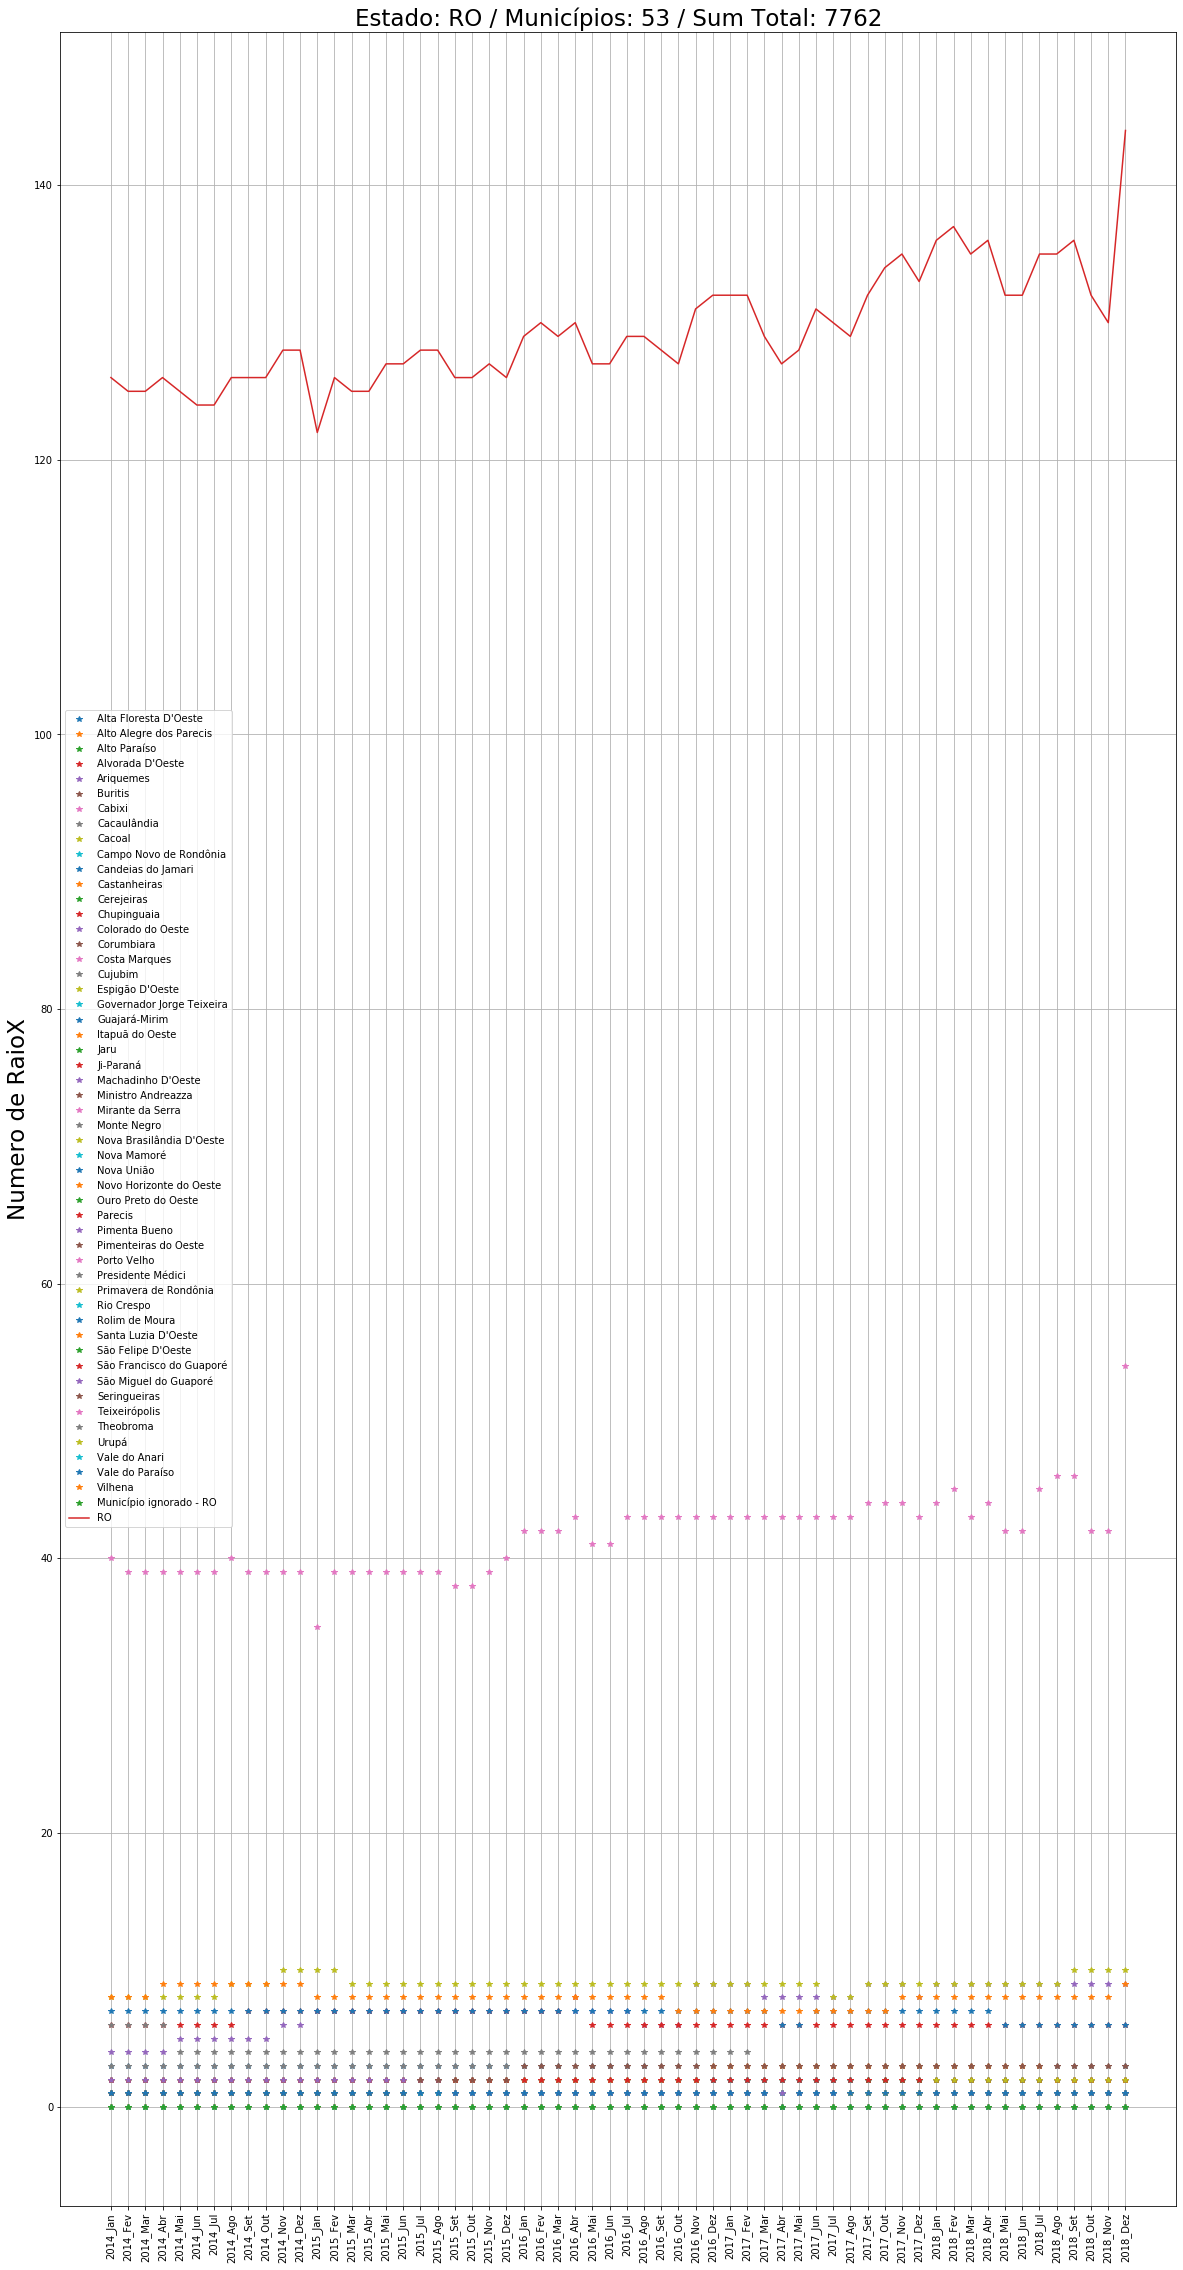

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_RaioX,2014_por_RaioX_p_total,2014_RaioX_por_cento,2015_total_RaioX,2015_por_RaioX_p_total,2015_RaioX_por_cento,2016_total_RaioX,2016_por_RaioX_p_total,2016_RaioX_por_cento,2017_total_RaioX,2017_por_RaioX_p_total,2017_RaioX_por_cento,2018_total_RaioX,2018_por_RaioX_p_total,2018_RaioX_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,1509,12,0.007952,1513,12,0.007931,1548,14,0.009044,1572,24,0.015267,1620,24,0.014815
1,11.0,110037.0,Alto Alegre dos Parecis,1509,0,0.000000,1513,0,0.000000,1548,0,0.000000,1572,0,0.000000,1620,0,0.000000
2,11.0,110040.0,Alto Paraíso,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407
3,11.0,110034.0,Alvorada D'Oeste,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407
4,11.0,110002.0,Ariquemes,1509,58,0.038436,1513,84,0.055519,1548,85,0.054910,1572,101,0.064249,1620,108,0.066667
5,11.0,110045.0,Buritis,1509,0,0.000000,1513,0,0.000000,1548,0,0.000000,1572,0,0.000000,1620,0,0.000000
6,11.0,110003.0,Cabixi,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407
7,11.0,110060.0,Cacaulândia,1509,24,0.015905,1513,24,0.015863,1548,24,0.015504,1572,24,0.015267,1620,24,0.014815
8,11.0,110004.0,Cacoal,1509,103,0.068257,1513,110,0.072703,1548,108,0.069767,1572,106,0.067430,1620,112,0.069136
9,11.0,110070.0,Campo Novo de Rondônia,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.043478,2.043478,2.086957,2.086957,2.130435,2.130435,2.173913,2.217391,2.391304,2.347826,...,2.565217,2.565217,2.565217,2.565217,2.565217,2.565217,2.652174,2.652174,2.652174,2.652174
std,5.226491,5.226491,5.212860,5.212860,5.198814,5.198814,5.399092,5.599972,5.441750,5.449009,...,5.774758,5.774758,5.774758,5.774758,5.774758,5.774758,5.959017,5.959017,5.959017,5.959017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.000000,...,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,26.000000,27.000000,26.000000,26.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000,29.000000,29.000000,29.000000


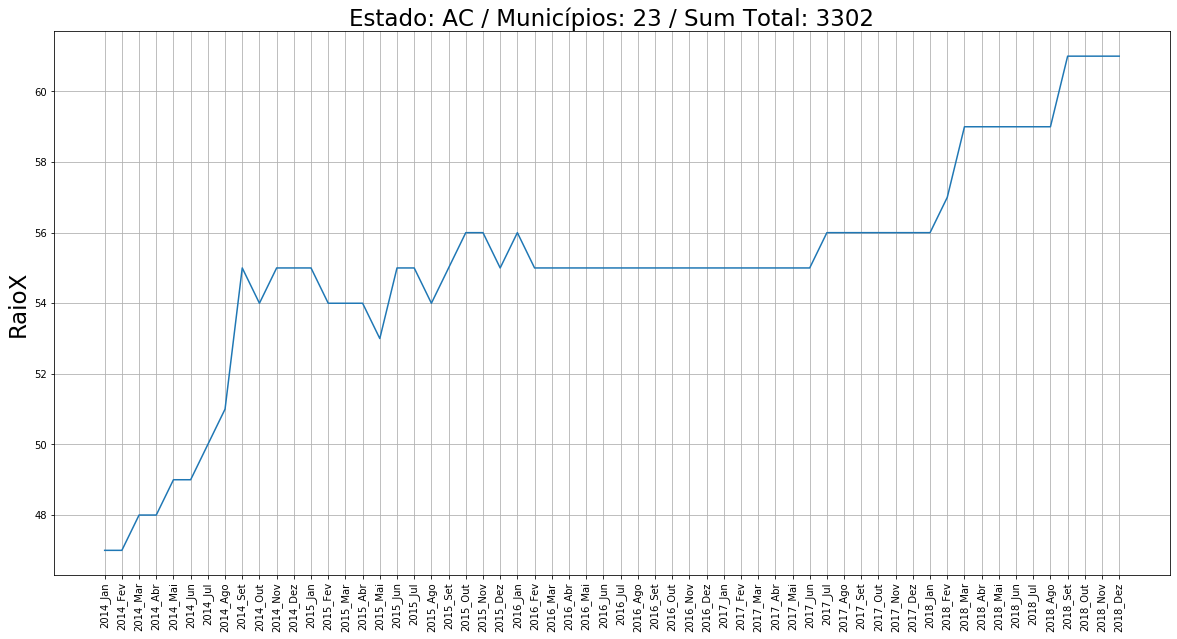

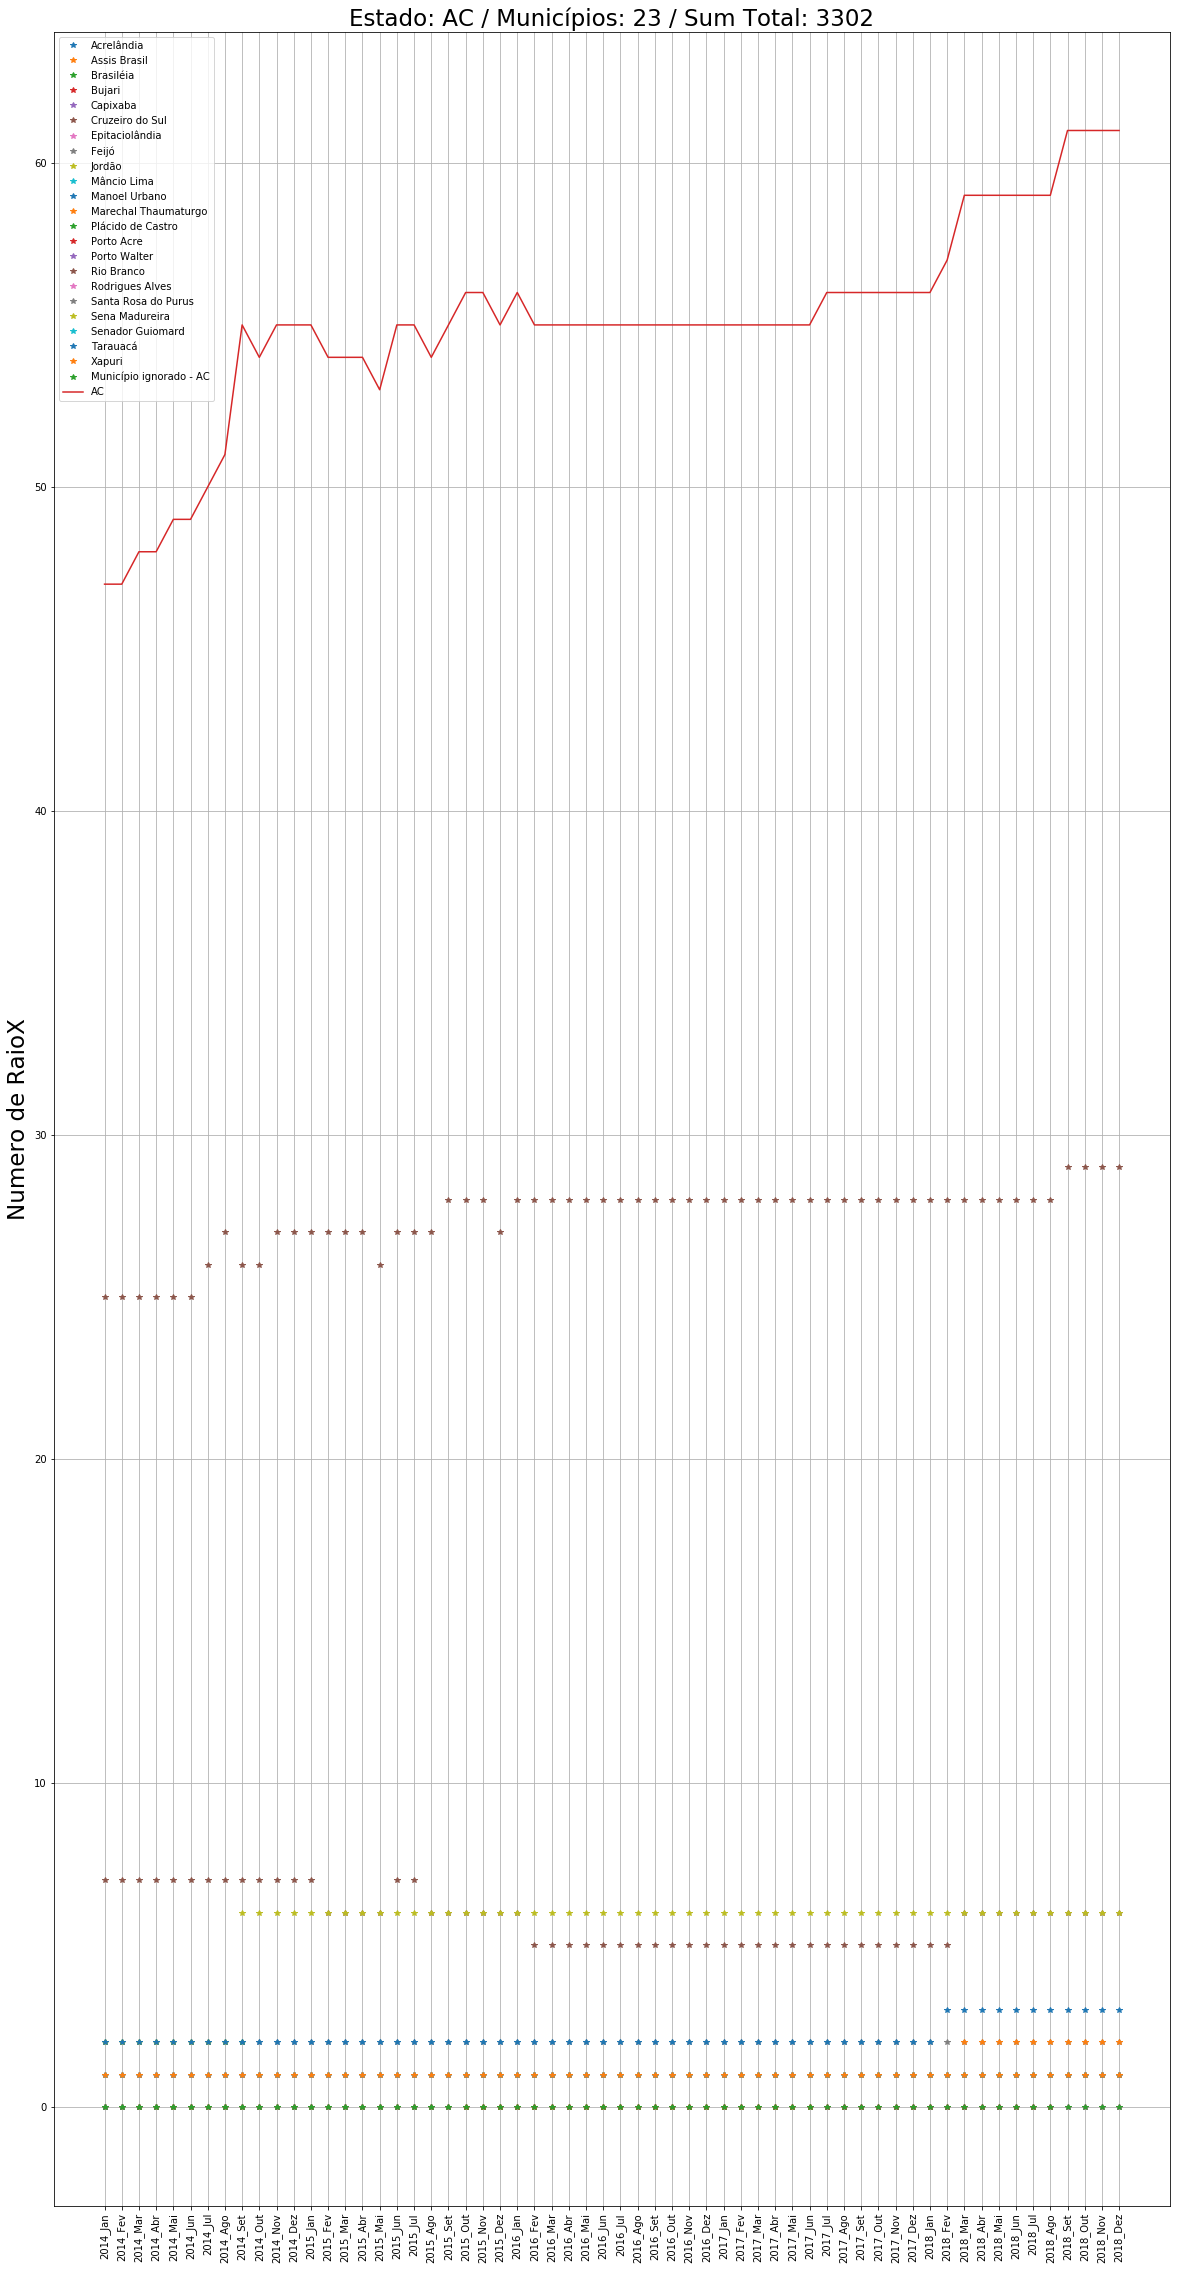

,Estado,Val_Municipio,Município,2014_total_RaioX,2014_por_RaioX_p_total,2014_RaioX_por_cento,2015_total_RaioX,2015_por_RaioX_p_total,2015_RaioX_por_cento,2016_total_RaioX,2016_por_RaioX_p_total,2016_RaioX_por_cento,2017_total_RaioX,2017_por_RaioX_p_total,2017_RaioX_por_cento,2018_total_RaioX,2018_por_RaioX_p_total,2018_RaioX_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,1509,12,0.007952,1513,12,0.007931,1548,14,0.009044,1572,24,0.015267,1620,24,0.014815
1,11.0,110037.0,Alto Alegre dos Parecis,1509,0,0.000000,1513,0,0.000000,1548,0,0.000000,1572,0,0.000000,1620,0,0.000000
2,11.0,110040.0,Alto Paraíso,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407
3,11.0,110034.0,Alvorada D'Oeste,1509,12,0.007952,1513,12,0.007931,1548,12,0.007752,1572,12,0.007634,1620,12,0.007407
4,11.0,110002.0,Ariquemes,1509,58,0.038436,1513,84,0.055519,1548,85,0.054910,1572,101,0.064249,1620,108,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,608,40,0.065789,656,72,0.109756,661,72,0.108926,666,72,0.108108,711,72,0.101266
72,12.0,120045.0,Senador Guiomard,608,12,0.019737,656,12,0.018293,661,12,0.018154,666,12,0.018018,711,12,0.016878
73,12.0,120060.0,Tarauacá,608,24,0.039474,656,24,0.036585,661,24,0.036309,666,24,0.036036,711,35,0.049226
74,12.0,120070.0,Xapuri,608,12,0.019737,656,12,0.018293,661,12,0.018154,666,12,0.018018,711,12,0.016878


In [45]:
data_raiox = pd.read_csv('../data/RF- Raios X.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data_raiox.copy()
label_s = new_names
name_y_label = 'RaioX'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### RF - Tomógrafos Computadorizados

In [ ]:
# CT = pd.read_csv('../data/RF- Tomógrafos Computadorizados.csv', sep=';', skiprows=4, encoding='latin1')
# CT.columns
# CT.index
# dis = False
# aux = CT.copy()
# describe_anali(aux,dis)
# aux = CT.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de CT'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,0.207547,...,0.264151,0.264151,0.264151,0.264151,0.283019,0.283019,0.283019,0.283019,0.283019,0.301887
std,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,1.115597,...,1.076871,1.162738,1.076871,1.076871,1.198996,1.198996,1.198996,1.198996,1.198996,1.324109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,7.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,9.000000


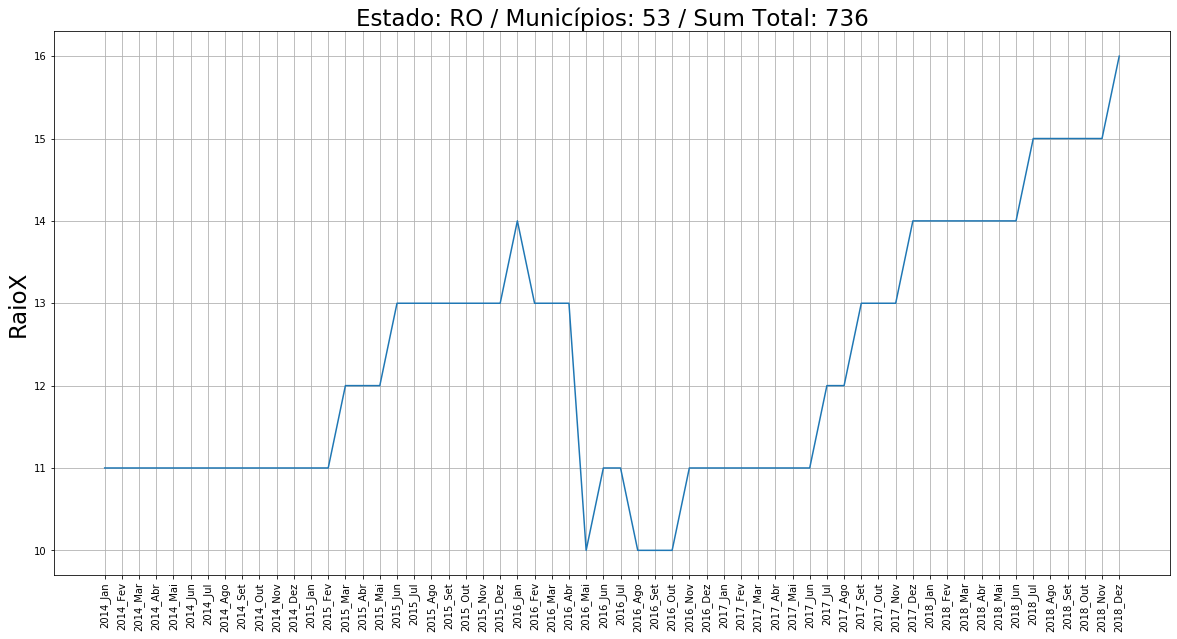

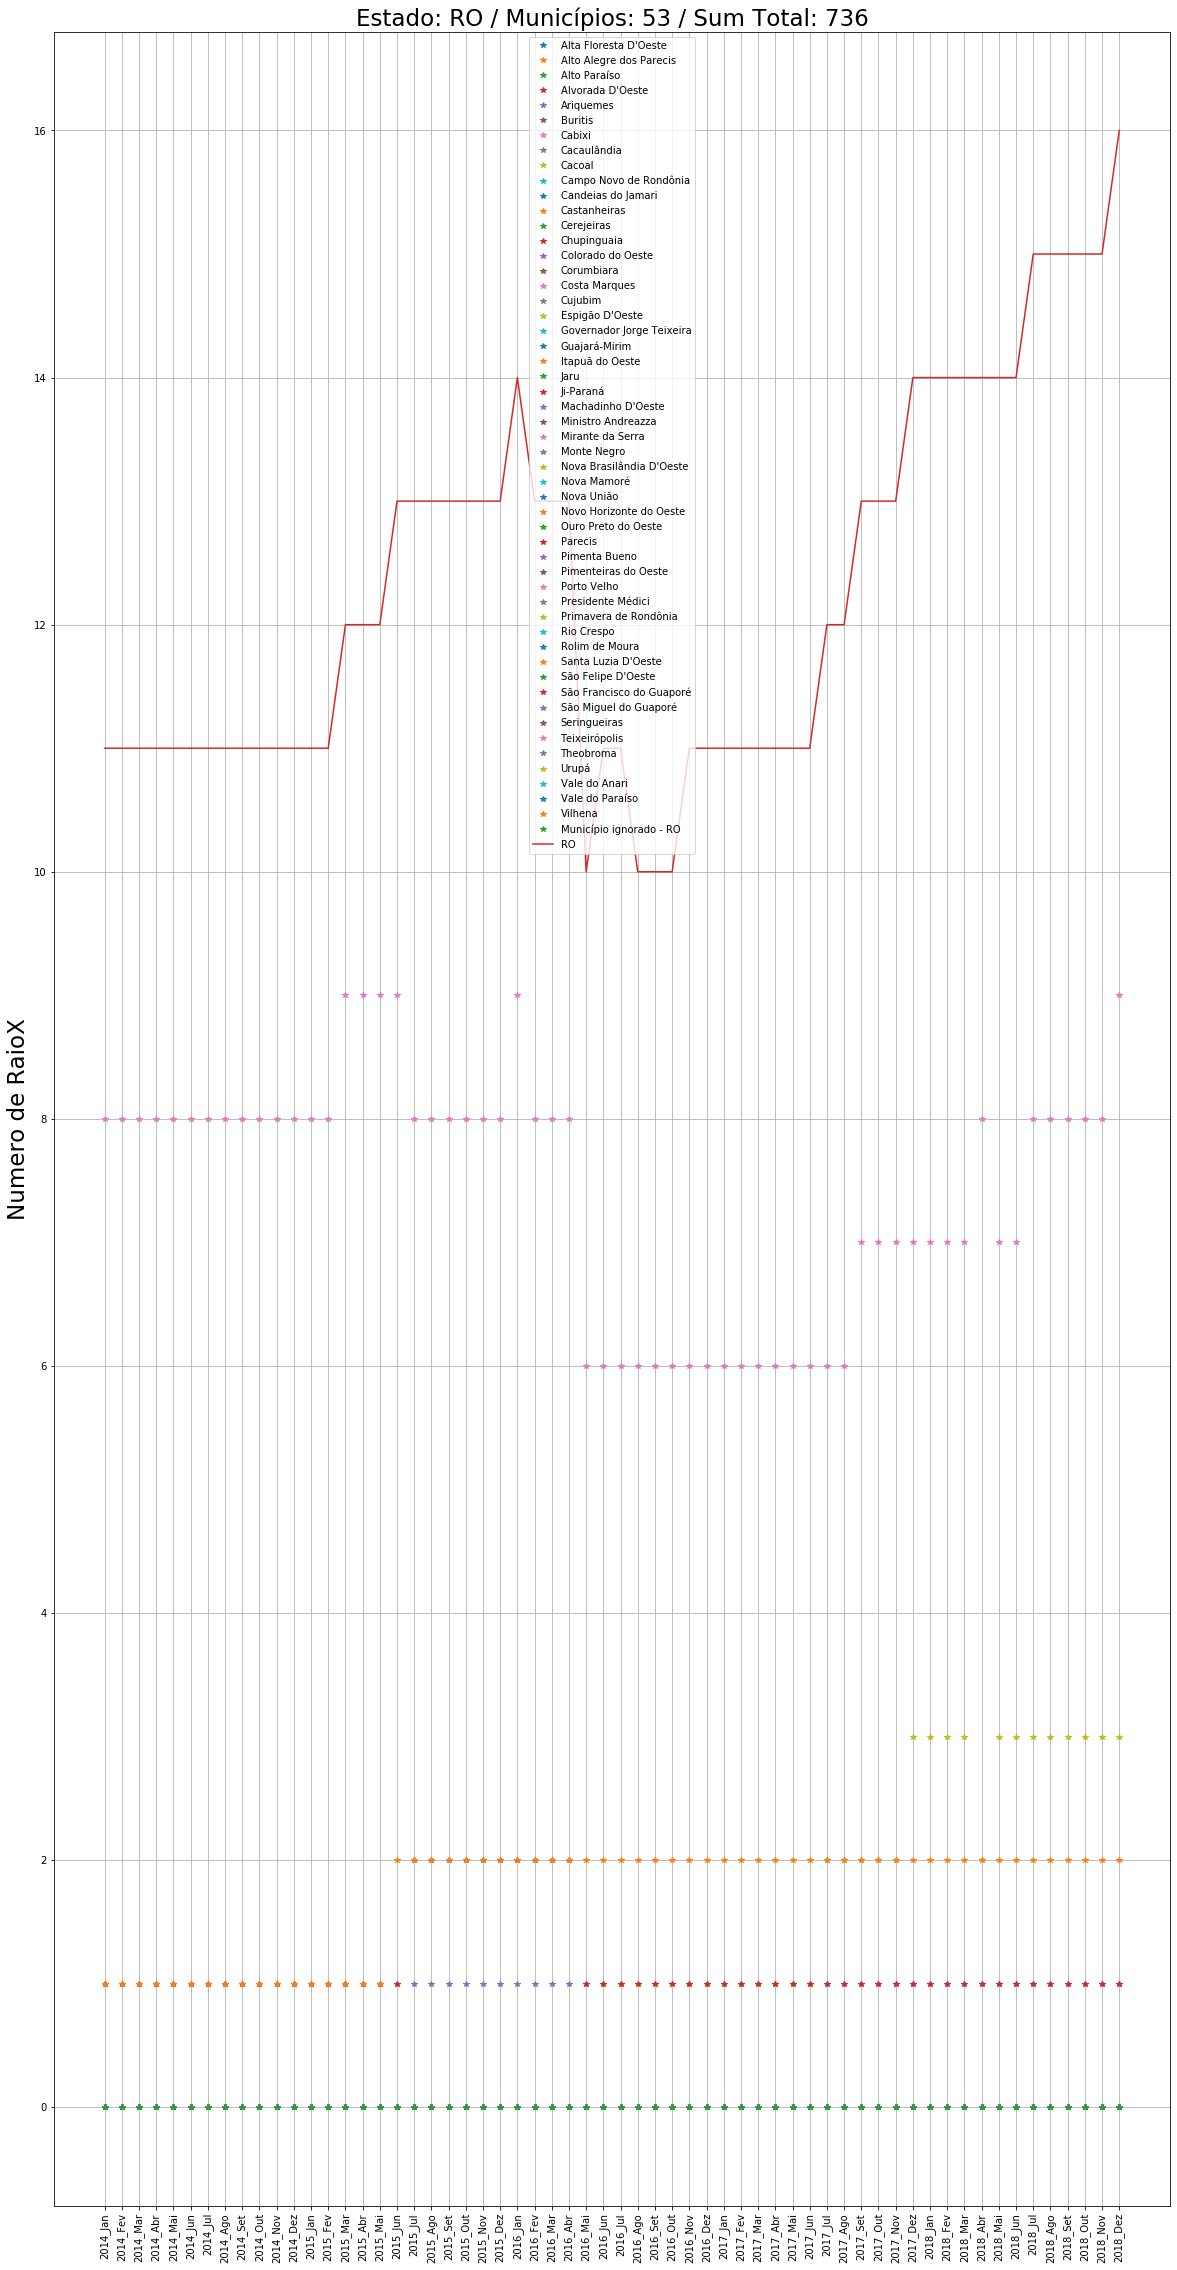

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_RaioX,2014_por_RaioX_p_total,2014_RaioX_por_cento,2015_total_RaioX,2015_por_RaioX_p_total,2015_RaioX_por_cento,2016_total_RaioX,2016_por_RaioX_p_total,2016_RaioX_por_cento,2017_total_RaioX,2017_por_RaioX_p_total,2017_RaioX_por_cento,2018_total_RaioX,2018_por_RaioX_p_total,2018_RaioX_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
2,11.0,110040.0,Alto Paraíso,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
4,11.0,110002.0,Ariquemes,132,12,0.090909,149,12,0.080537,137,9,0.065693,143,12,0.083916,175,12,0.068571
5,11.0,110045.0,Buritis,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
6,11.0,110003.0,Cabixi,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
7,11.0,110060.0,Cacaulândia,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
8,11.0,110004.0,Cacoal,132,0,0.000000,149,0,0.000000,137,7,0.051095,143,19,0.132867,175,35,0.200000
9,11.0,110070.0,Campo Novo de Rondônia,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.130435,0.130435,0.130435,0.130435,0.130435,0.173913,0.173913,0.173913,0.173913,0.173913,...,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435,0.130435
std,0.457697,0.457697,0.457697,0.457697,0.457697,0.650327,0.650327,0.650327,0.650327,0.650327,...,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697,0.457697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


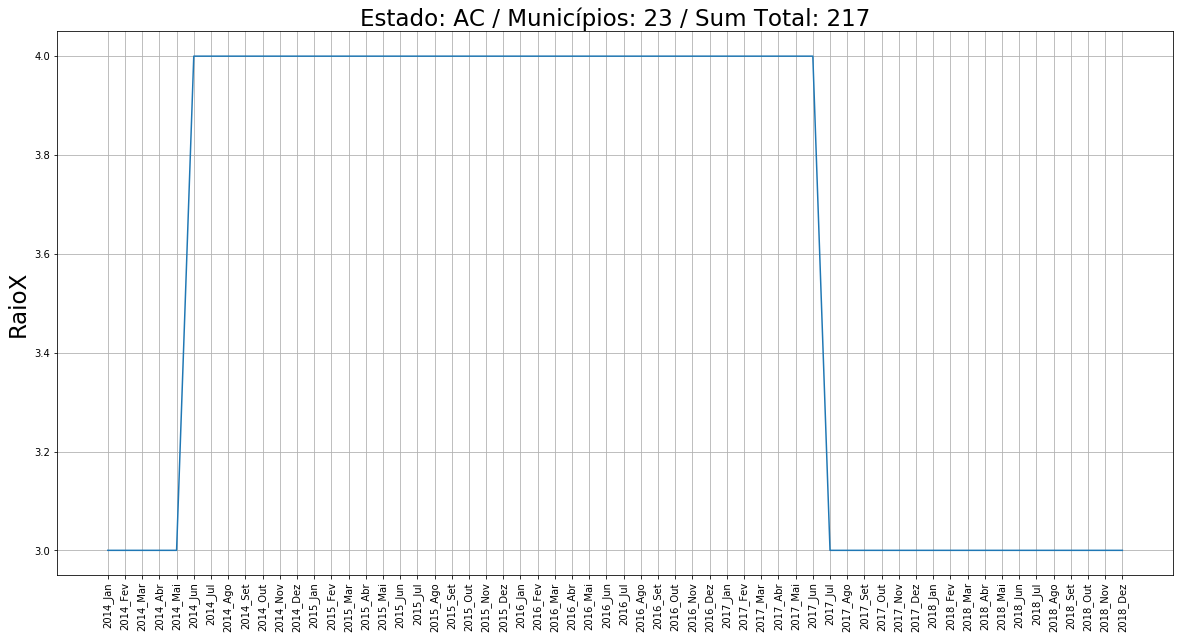

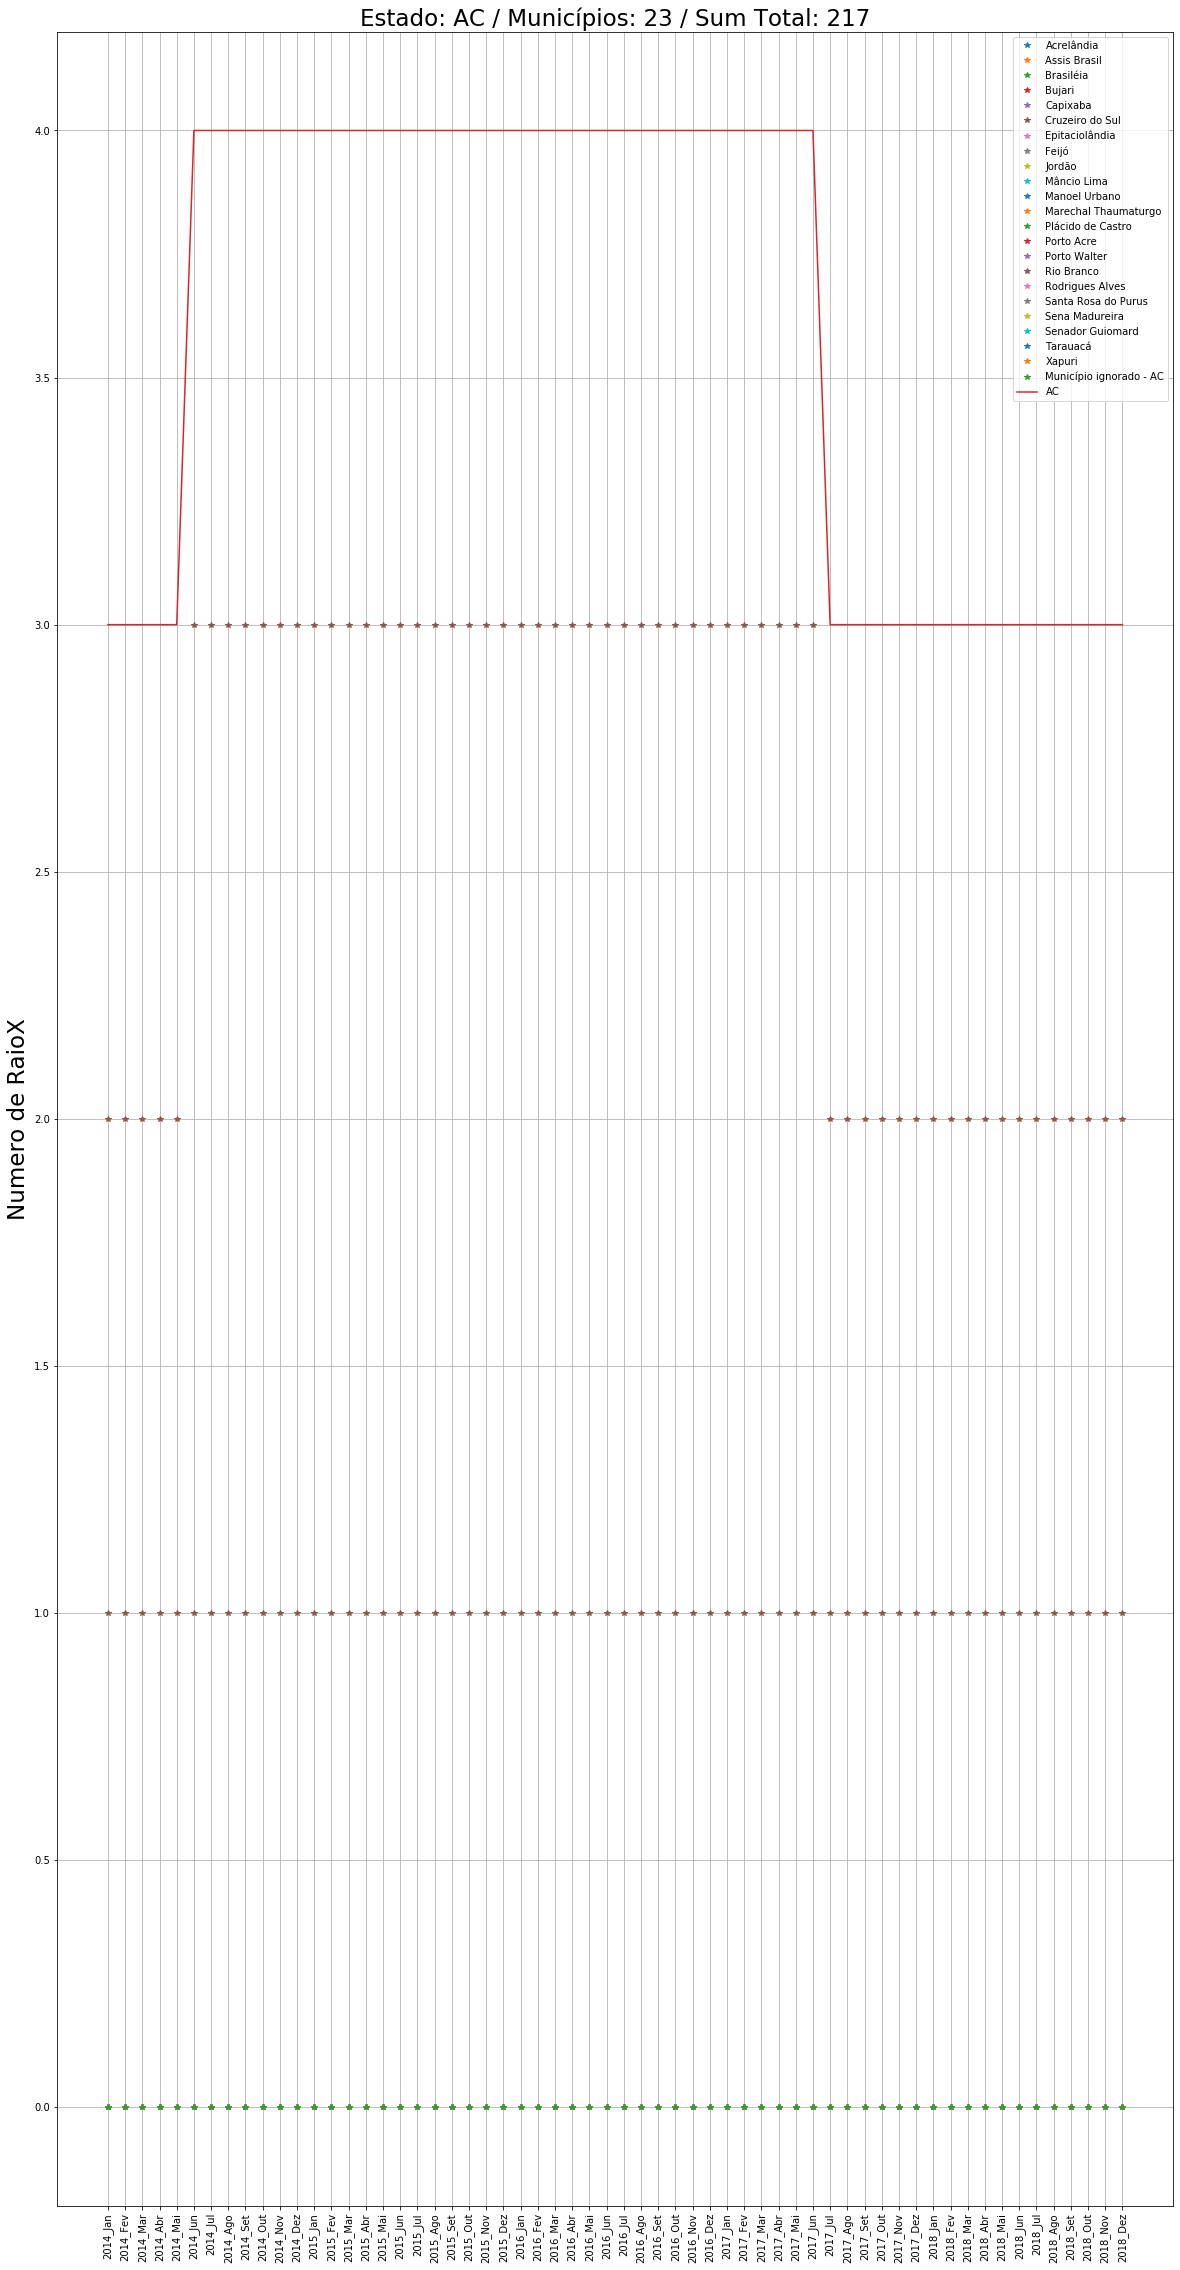

,Estado,Val_Municipio,Município,2014_total_RaioX,2014_por_RaioX_p_total,2014_RaioX_por_cento,2015_total_RaioX,2015_por_RaioX_p_total,2015_RaioX_por_cento,2016_total_RaioX,2016_por_RaioX_p_total,2016_RaioX_por_cento,2017_total_RaioX,2017_por_RaioX_p_total,2017_RaioX_por_cento,2018_total_RaioX,2018_por_RaioX_p_total,2018_RaioX_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
2,11.0,110040.0,Alto Paraíso,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,132,0,0.000000,149,0,0.000000,137,0,0.000000,143,0,0.000000,175,0,0.000000
4,11.0,110002.0,Ariquemes,132,12,0.090909,149,12,0.080537,137,9,0.065693,143,12,0.083916,175,12,0.068571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,43,0,0.000000,48,0,0.000000,48,0,0.000000,42,0,0.000000,36,0,0.000000
72,12.0,120045.0,Senador Guiomard,43,0,0.000000,48,0,0.000000,48,0,0.000000,42,0,0.000000,36,0,0.000000
73,12.0,120060.0,Tarauacá,43,0,0.000000,48,0,0.000000,48,0,0.000000,42,0,0.000000,36,0,0.000000
74,12.0,120070.0,Xapuri,43,0,0.000000,48,0,0.000000,48,0,0.000000,42,0,0.000000,36,0,0.000000


In [46]:
data_raiox = pd.read_csv('../data/RF- Tomógrafos Computadorizados.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data_raiox.copy()
label_s = new_names
name_y_label = 'RaioX'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### RF - Ressonância Magnética

In [ ]:
# data = pd.read_csv('../data/RF-Ressonância Magnética.csv', sep=';', skiprows=4, encoding='latin1')
# data.columns
# data.index
# dis = False
# aux = data.copy()
# describe_anali(aux,dis)
# aux = data.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de Ressonancia Magnetica'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.094340,0.094340,0.094340,0.094340,0.132075,0.132075,0.132075,0.132075,0.132075,0.132075,...,0.207547,0.207547,0.188679,0.188679,0.207547,0.207547,0.207547,0.207547,0.207547,0.226415
std,0.449964,0.449964,0.449964,0.449964,0.589581,0.589581,0.589581,0.589581,0.589581,0.589581,...,1.006870,1.006870,0.878298,0.878298,1.006870,1.006870,1.006870,1.006870,1.006870,1.137499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000


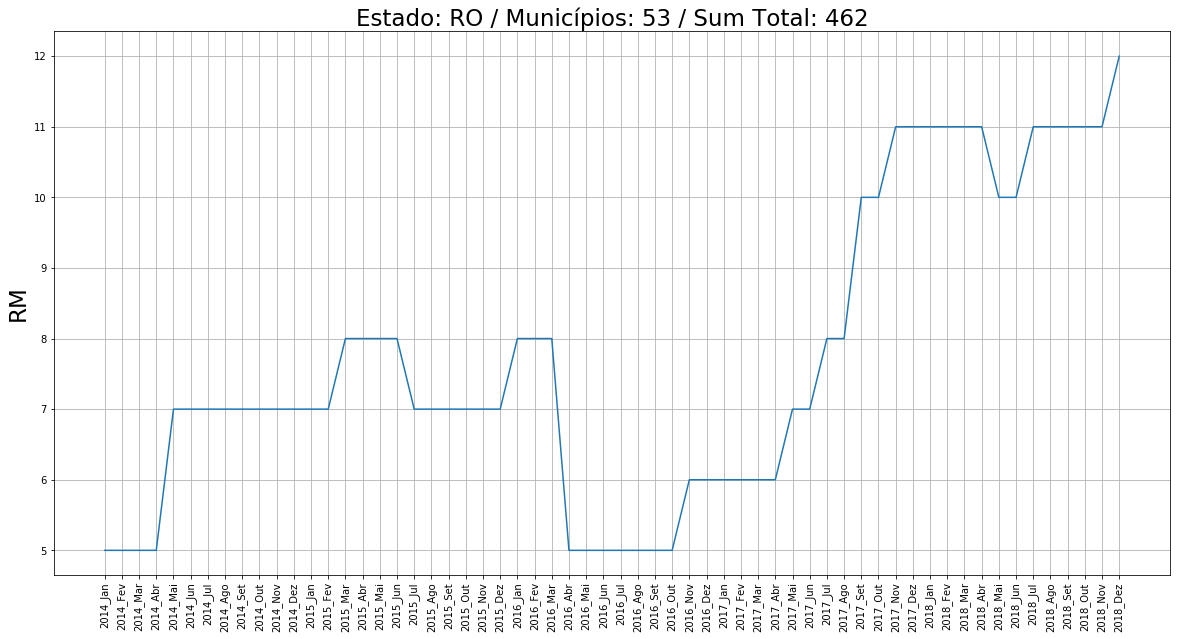

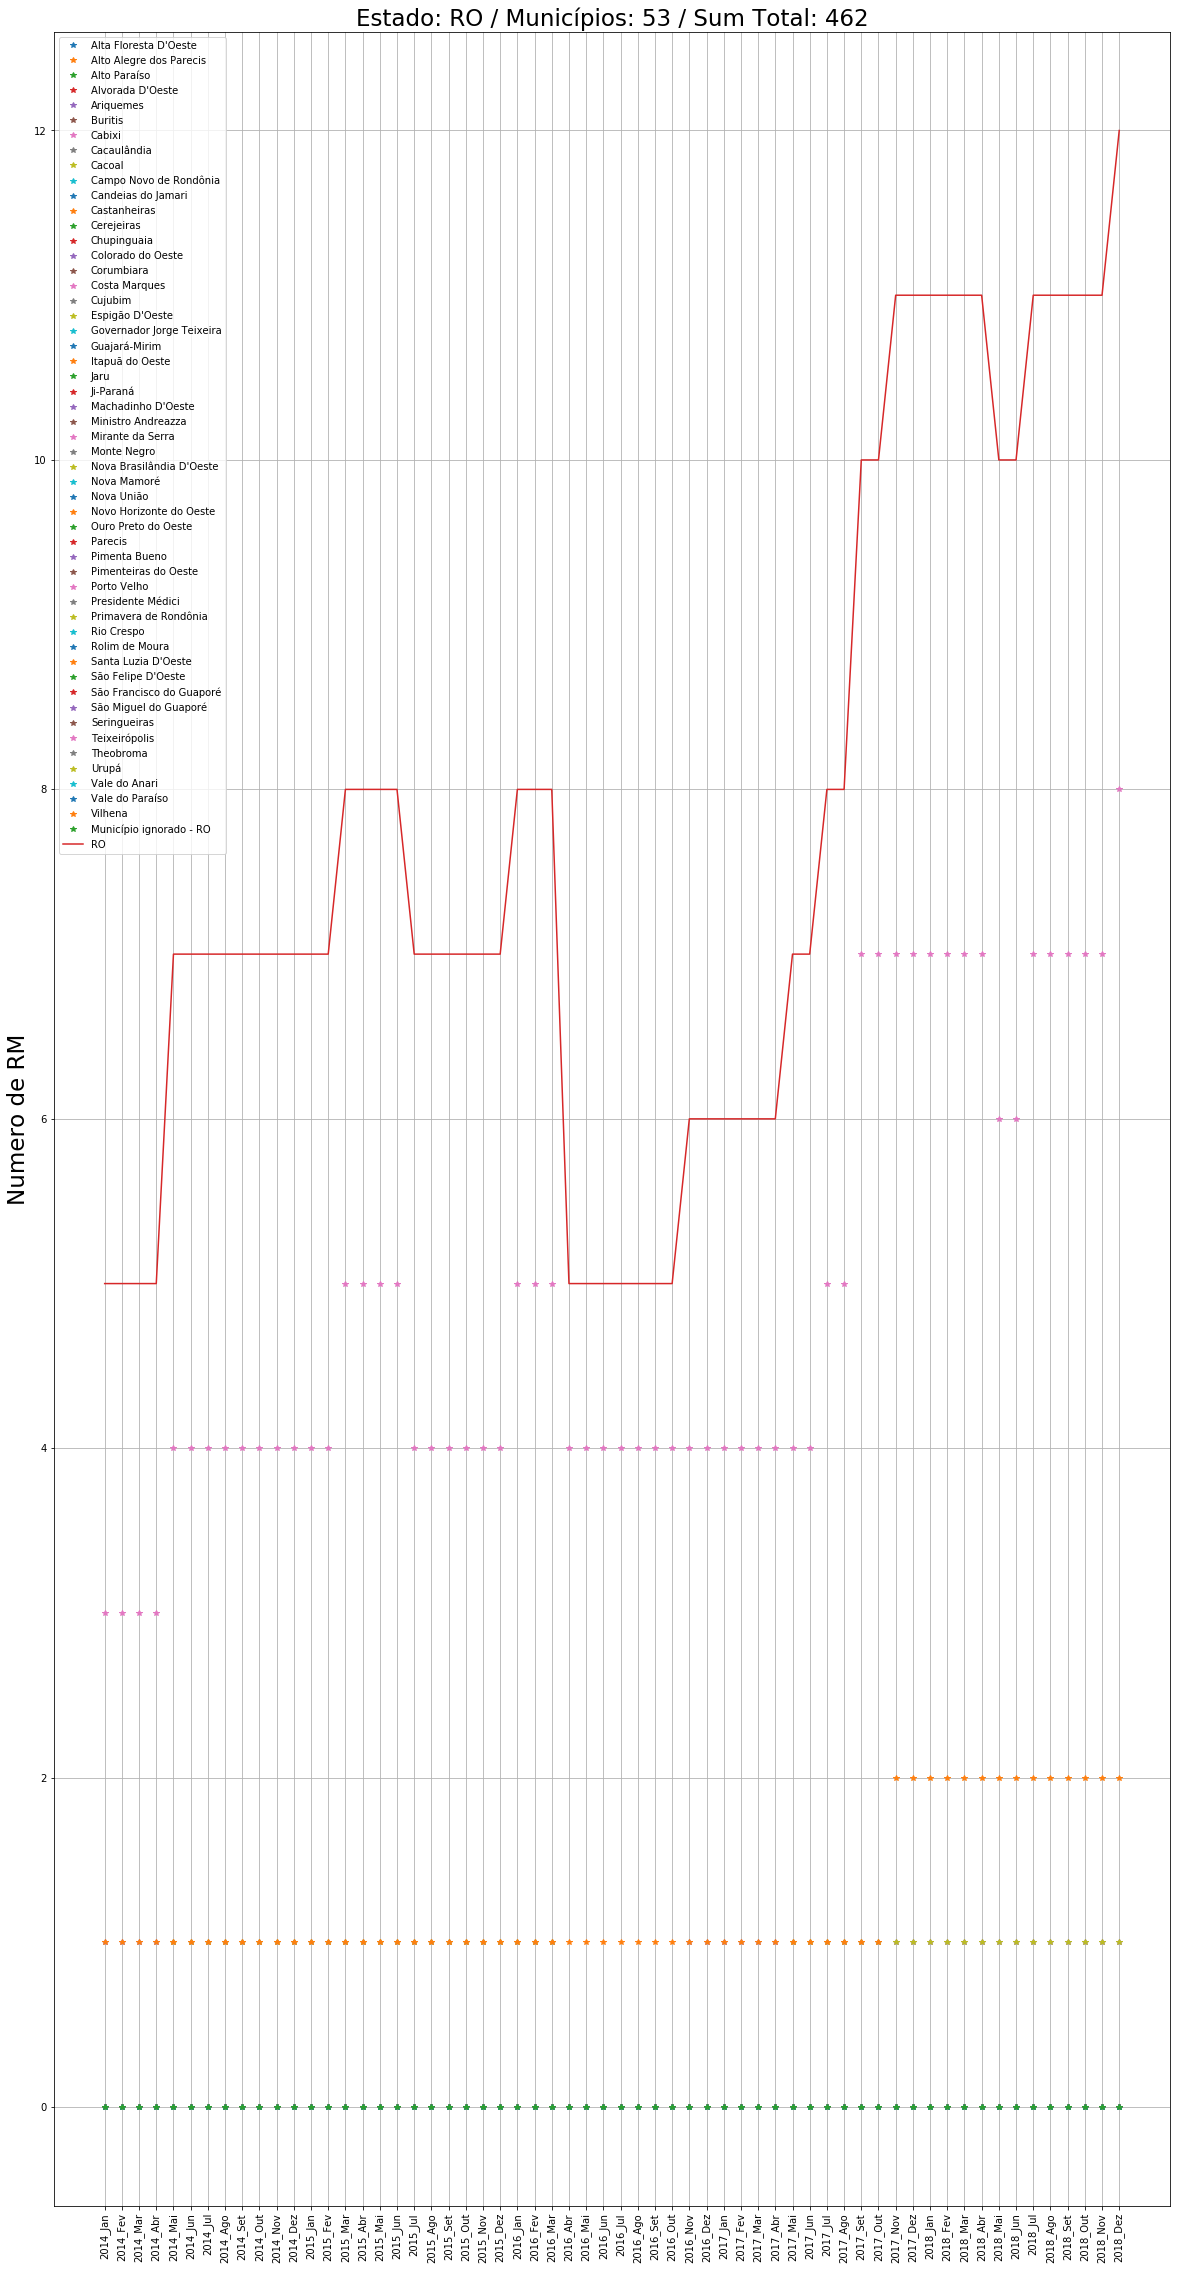

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_RM,2014_por_RM_p_total,2014_RM_por_cento,2015_total_RM,2015_por_RM_p_total,2015_RM_por_cento,2016_total_RM,2016_por_RM_p_total,2016_RM_por_cento,2017_total_RM,2017_por_RM_p_total,2017_RM_por_cento,2018_total_RM,2018_por_RM_p_total,2018_RM_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
2,11.0,110040.0,Alto Paraíso,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
4,11.0,110002.0,Ariquemes,76,12,0.157895,88,12,0.136364,71,5,0.070423,96,12,0.125000,131,12,0.091603
5,11.0,110045.0,Buritis,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
6,11.0,110003.0,Cabixi,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
7,11.0,110060.0,Cacaulândia,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000
8,11.0,110004.0,Cacoal,76,8,0.105263,88,12,0.136364,71,3,0.042254,96,8,0.083333,131,12,0.091603
9,11.0,110070.0,Campo Novo de Rondônia,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000000,131,0,0.000000


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,...,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957,0.086957
std,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,0.208514,...,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029,0.417029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


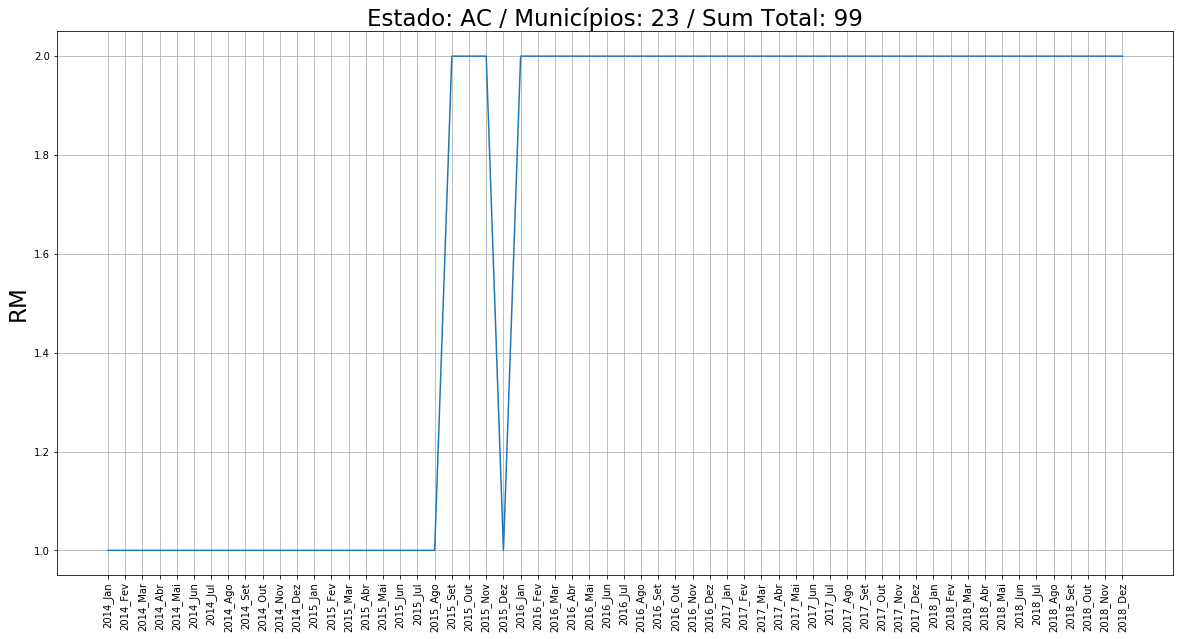

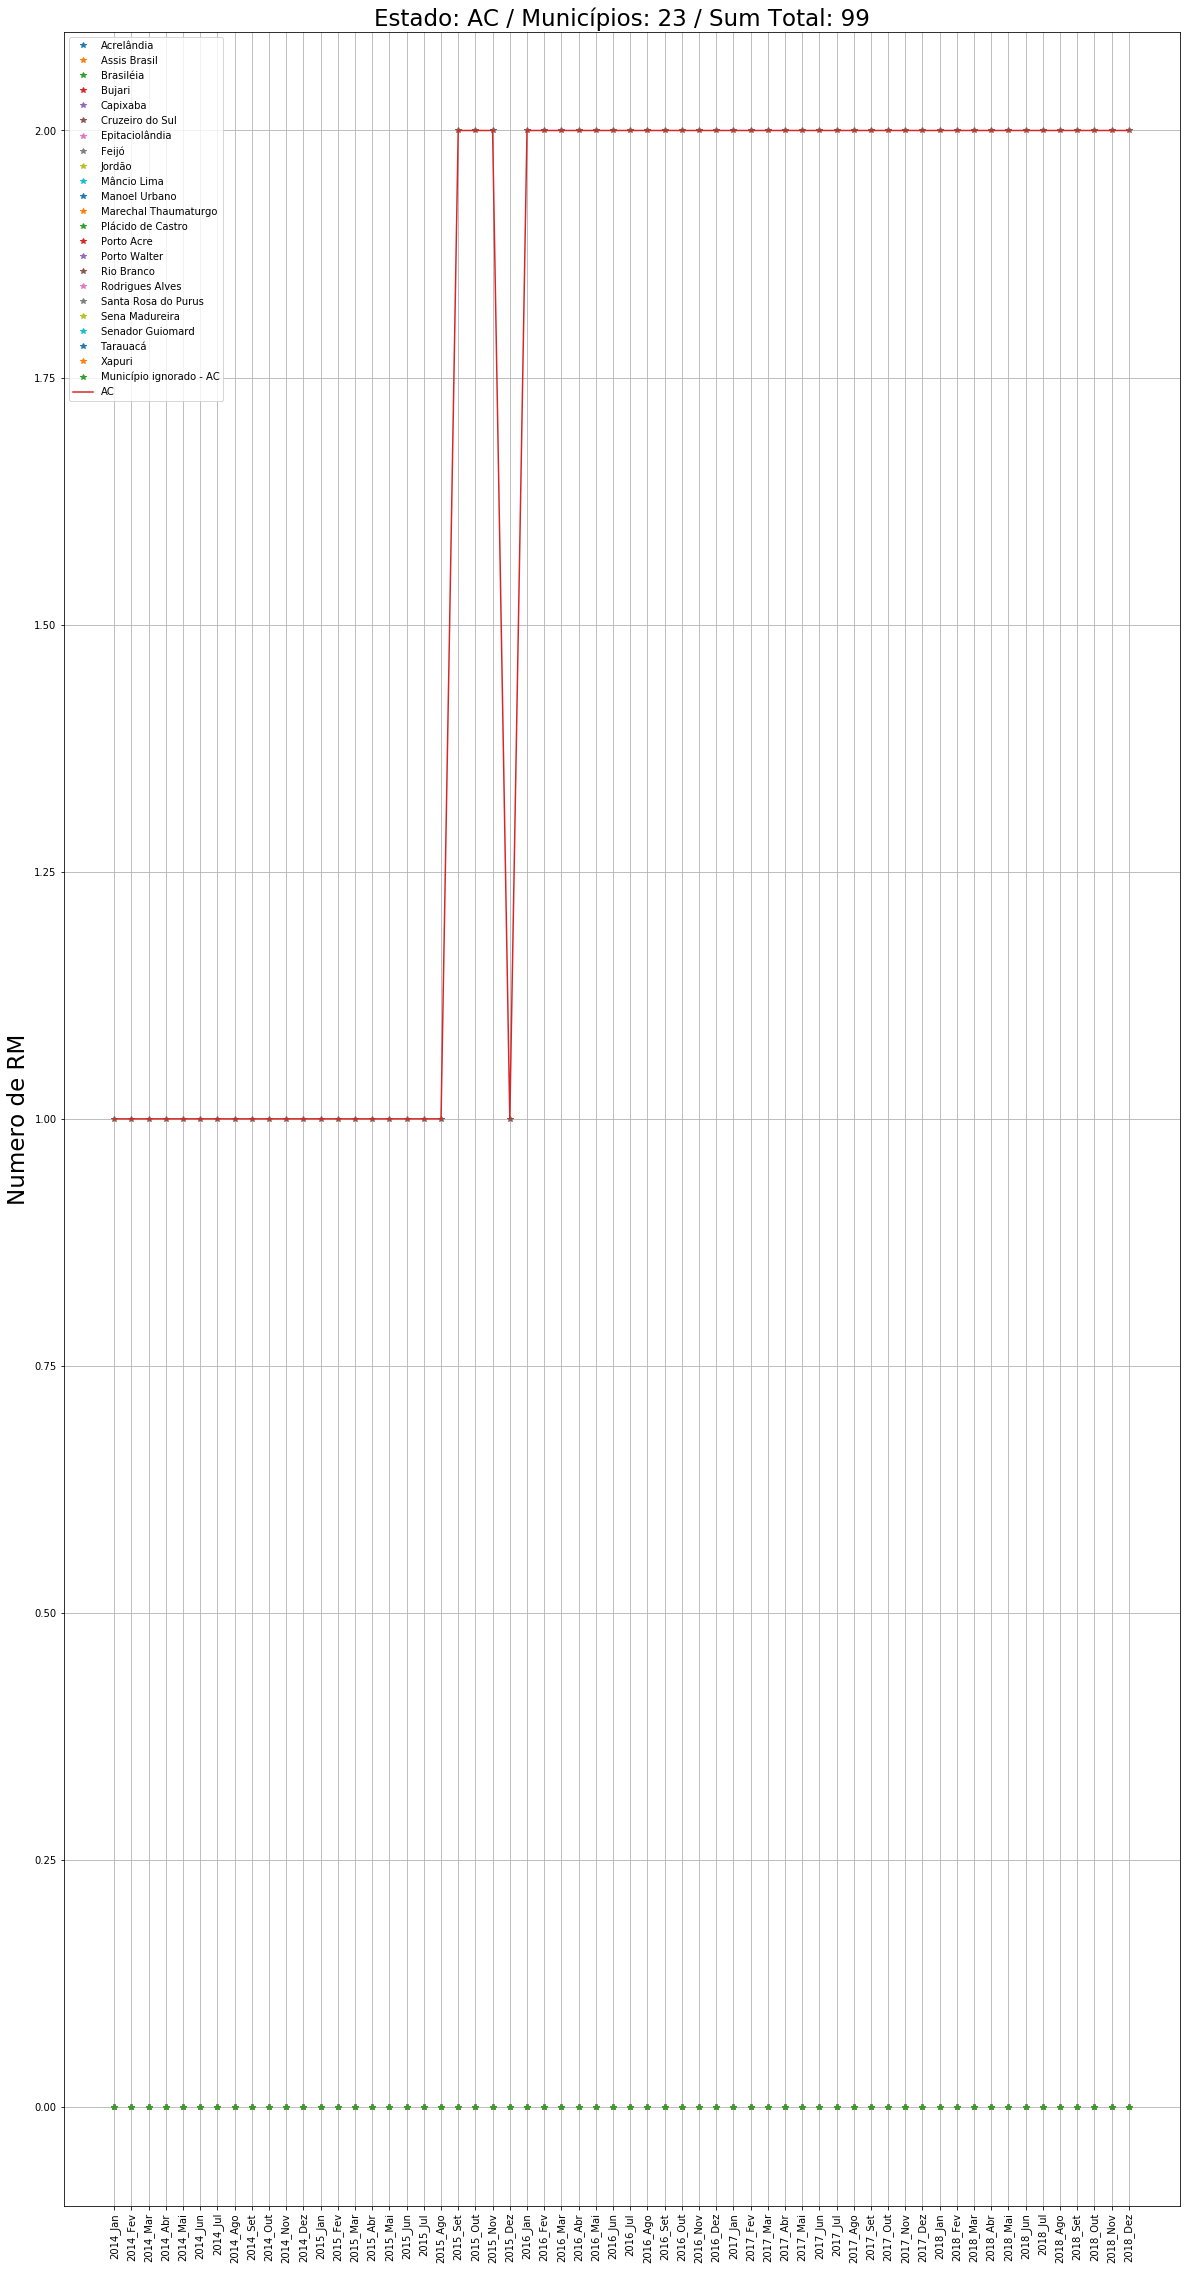

,Estado,Val_Municipio,Município,2014_total_RM,2014_por_RM_p_total,2014_RM_por_cento,2015_total_RM,2015_por_RM_p_total,2015_RM_por_cento,2016_total_RM,2016_por_RM_p_total,2016_RM_por_cento,2017_total_RM,2017_por_RM_p_total,2017_RM_por_cento,2018_total_RM,2018_por_RM_p_total,2018_RM_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000,131,0,0.000000
1,11.0,110037.0,Alto Alegre dos Parecis,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000,131,0,0.000000
2,11.0,110040.0,Alto Paraíso,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000,131,0,0.000000
3,11.0,110034.0,Alvorada D'Oeste,76,0,0.000000,88,0,0.000000,71,0,0.000000,96,0,0.000,131,0,0.000000
4,11.0,110002.0,Ariquemes,76,12,0.157895,88,12,0.136364,71,5,0.070423,96,12,0.125,131,12,0.091603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,12,0,0.000000,15,0,0.000000,24,0,0.000000,24,0,0.000,24,0,0.000000
72,12.0,120045.0,Senador Guiomard,12,0,0.000000,15,0,0.000000,24,0,0.000000,24,0,0.000,24,0,0.000000
73,12.0,120060.0,Tarauacá,12,0,0.000000,15,0,0.000000,24,0,0.000000,24,0,0.000,24,0,0.000000
74,12.0,120070.0,Xapuri,12,0,0.000000,15,0,0.000000,24,0,0.000000,24,0,0.000,24,0,0.000000


In [47]:
data = pd.read_csv('../data/RF-Ressonância Magnética.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data.copy()
label_s = new_names
name_y_label = 'RM'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### RF - Enfermeiros

In [ ]:
# data = pd.read_csv('../data/RH- Enfermeiros.csv', sep=';', skiprows=4, encoding='latin1')
# data.columns
# data.index
# dis = False
# aux = data.copy()
# describe_anali(aux,dis)
# aux = data.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de RH - Enfermeiros'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,21.716981,21.905660,22.169811,22.169811,22.358491,22.584906,22.867925,23.207547,23.377358,23.547170,...,32.188679,32.471698,32.056604,32.301887,33.433962,33.490566,33.886792,33.962264,34.150943,34.075472
std,67.978327,69.294318,69.856924,69.889125,69.758952,69.933879,69.972807,70.780907,71.199672,71.383462,...,99.233806,101.612121,97.284953,97.600754,103.716980,103.652827,104.041904,104.190647,105.825400,105.812034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
50%,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,9.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,14.000000,14.000000,...,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,20.000000,21.000000
max,492.000000,501.000000,505.000000,505.000000,505.000000,505.000000,506.000000,512.000000,515.000000,516.000000,...,709.000000,728.000000,695.000000,697.000000,743.000000,743.000000,744.000000,743.000000,755.000000,754.000000


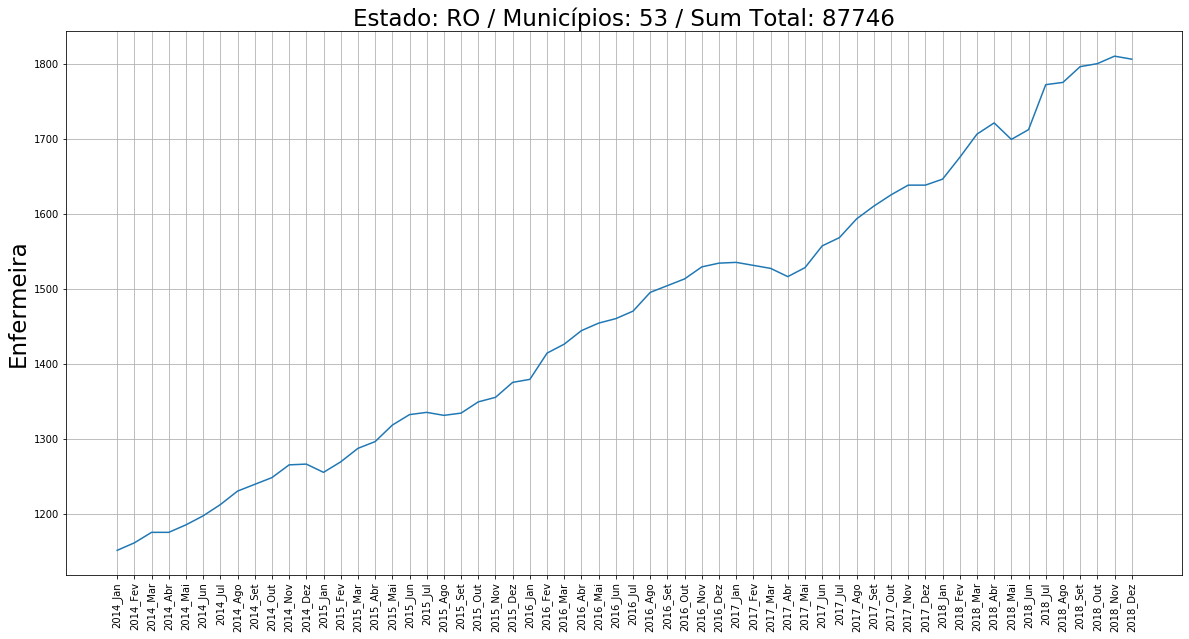

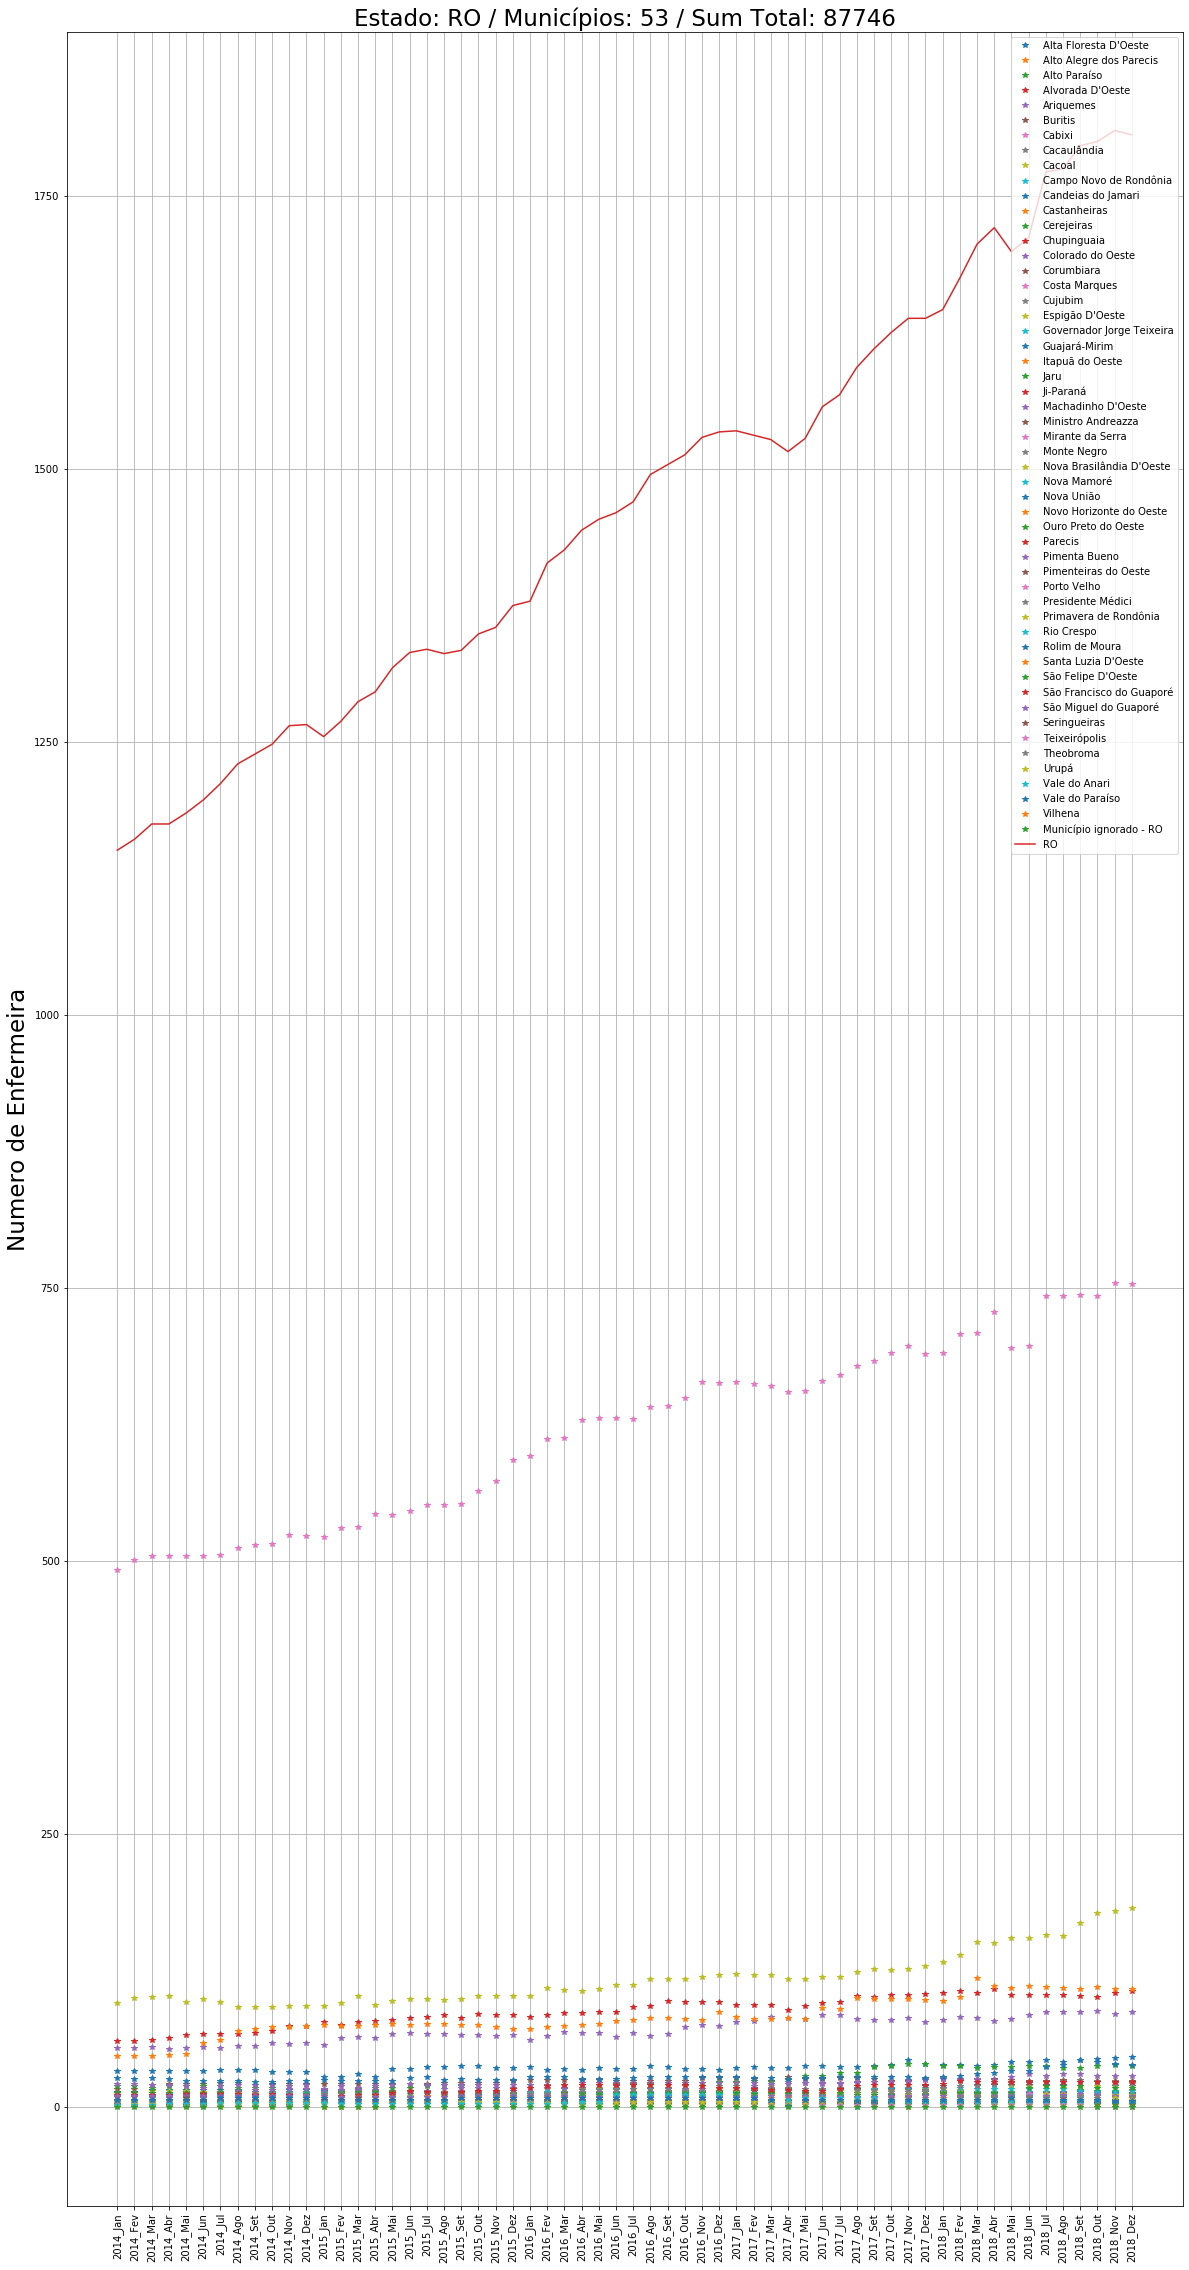

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_Enfermeira,2014_por_Enfermeira_p_total,2014_Enfermeira_por_cento,2015_total_Enfermeira,2015_por_Enfermeira_p_total,2015_Enfermeira_por_cento,2016_total_Enfermeira,2016_por_Enfermeira_p_total,2016_Enfermeira_por_cento,2017_total_Enfermeira,2017_por_Enfermeira_p_total,2017_Enfermeira_por_cento,2018_total_Enfermeira,2018_por_Enfermeira_p_total,2018_Enfermeira_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,14504,188,0.012962,15836,169,0.010672,17622,201,0.011406,18866,208,0.011025,20918,234,0.011187
1,11.0,110037.0,Alto Alegre dos Parecis,14504,77,0.005309,15836,84,0.005304,17622,81,0.004597,18866,96,0.005089,20918,116,0.005545
2,11.0,110040.0,Alto Paraíso,14504,101,0.006964,15836,114,0.007199,17622,138,0.007831,18866,154,0.008163,20918,109,0.005211
3,11.0,110034.0,Alvorada D'Oeste,14504,121,0.008343,15836,115,0.007262,17622,108,0.006129,18866,132,0.006997,20918,151,0.007219
4,11.0,110002.0,Ariquemes,14504,667,0.045987,15836,779,0.049192,17622,818,0.046419,18866,972,0.051521,20918,1010,0.048284
5,11.0,110045.0,Buritis,14504,244,0.016823,15836,259,0.016355,17622,299,0.016967,18866,311,0.016485,20918,298,0.014246
6,11.0,110003.0,Cabixi,14504,48,0.003309,15836,48,0.003031,17622,59,0.003348,18866,60,0.003180,20918,66,0.003155
7,11.0,110060.0,Cacaulândia,14504,48,0.003309,15836,49,0.003094,17622,40,0.002270,18866,36,0.001908,20918,47,0.002247
8,11.0,110004.0,Cacoal,14504,1151,0.079357,15836,1182,0.074640,17622,1347,0.076439,18866,1469,0.077865,20918,1907,0.091166
9,11.0,110070.0,Campo Novo de Rondônia,14504,106,0.007308,15836,129,0.008146,17622,161,0.009136,18866,140,0.007421,20918,139,0.006645


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,32.173913,32.000000,32.260870,32.304348,33.173913,34.173913,34.695652,35.521739,36.043478,36.173913,...,41.739130,42.130435,42.130435,42.217391,42.260870,42.521739,43.000000,43.173913,43.217391,43.173913
std,84.370208,83.223685,84.172019,83.676017,86.892123,89.435936,90.313311,93.557406,95.469404,95.115553,...,116.198583,116.495534,117.086722,117.481510,117.808094,118.353043,120.428779,121.215305,120.613943,121.003250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.500000,6.500000,6.500000,7.000000,7.000000,7.500000,7.500000,7.000000,7.000000,7.000000,...,8.000000,7.500000,7.500000,7.500000,8.000000,8.000000,8.000000,7.500000,7.500000,7.500000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,10.000000,10.000000,...,12.000000,10.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,11.000000
75%,18.000000,18.000000,18.000000,17.000000,18.000000,18.500000,18.500000,18.500000,18.500000,18.500000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.500000,19.500000,20.500000,19.500000
max,409.000000,403.000000,408.000000,405.000000,421.000000,433.000000,437.000000,453.000000,462.000000,460.000000,...,562.000000,563.000000,566.000000,568.000000,570.000000,573.000000,583.000000,587.000000,584.000000,586.000000


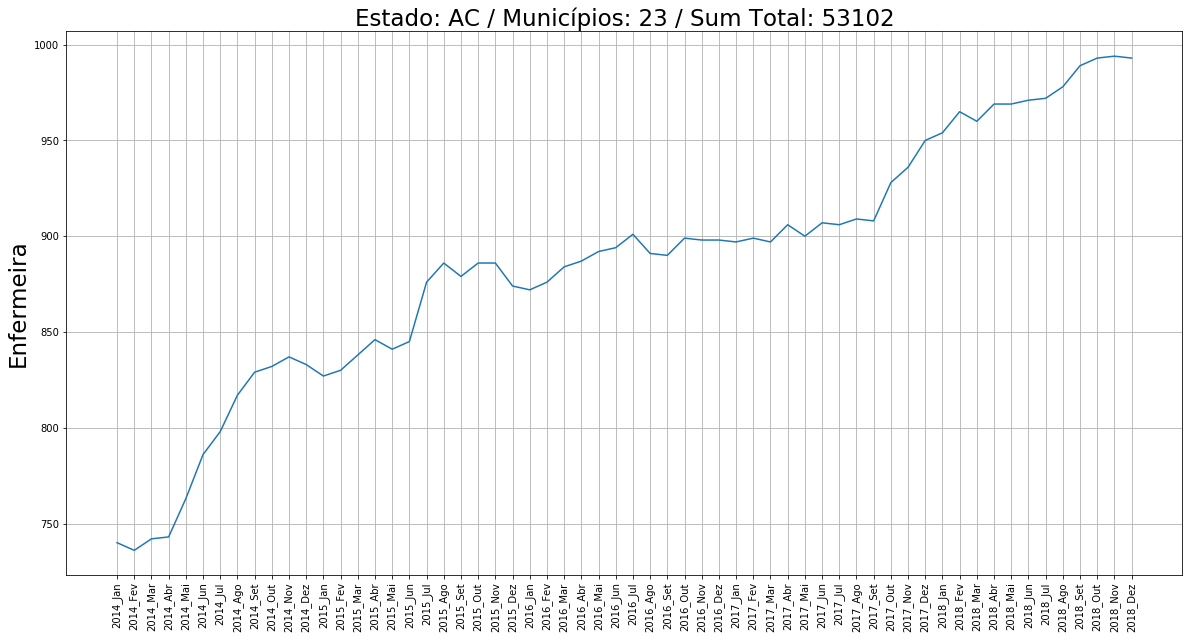

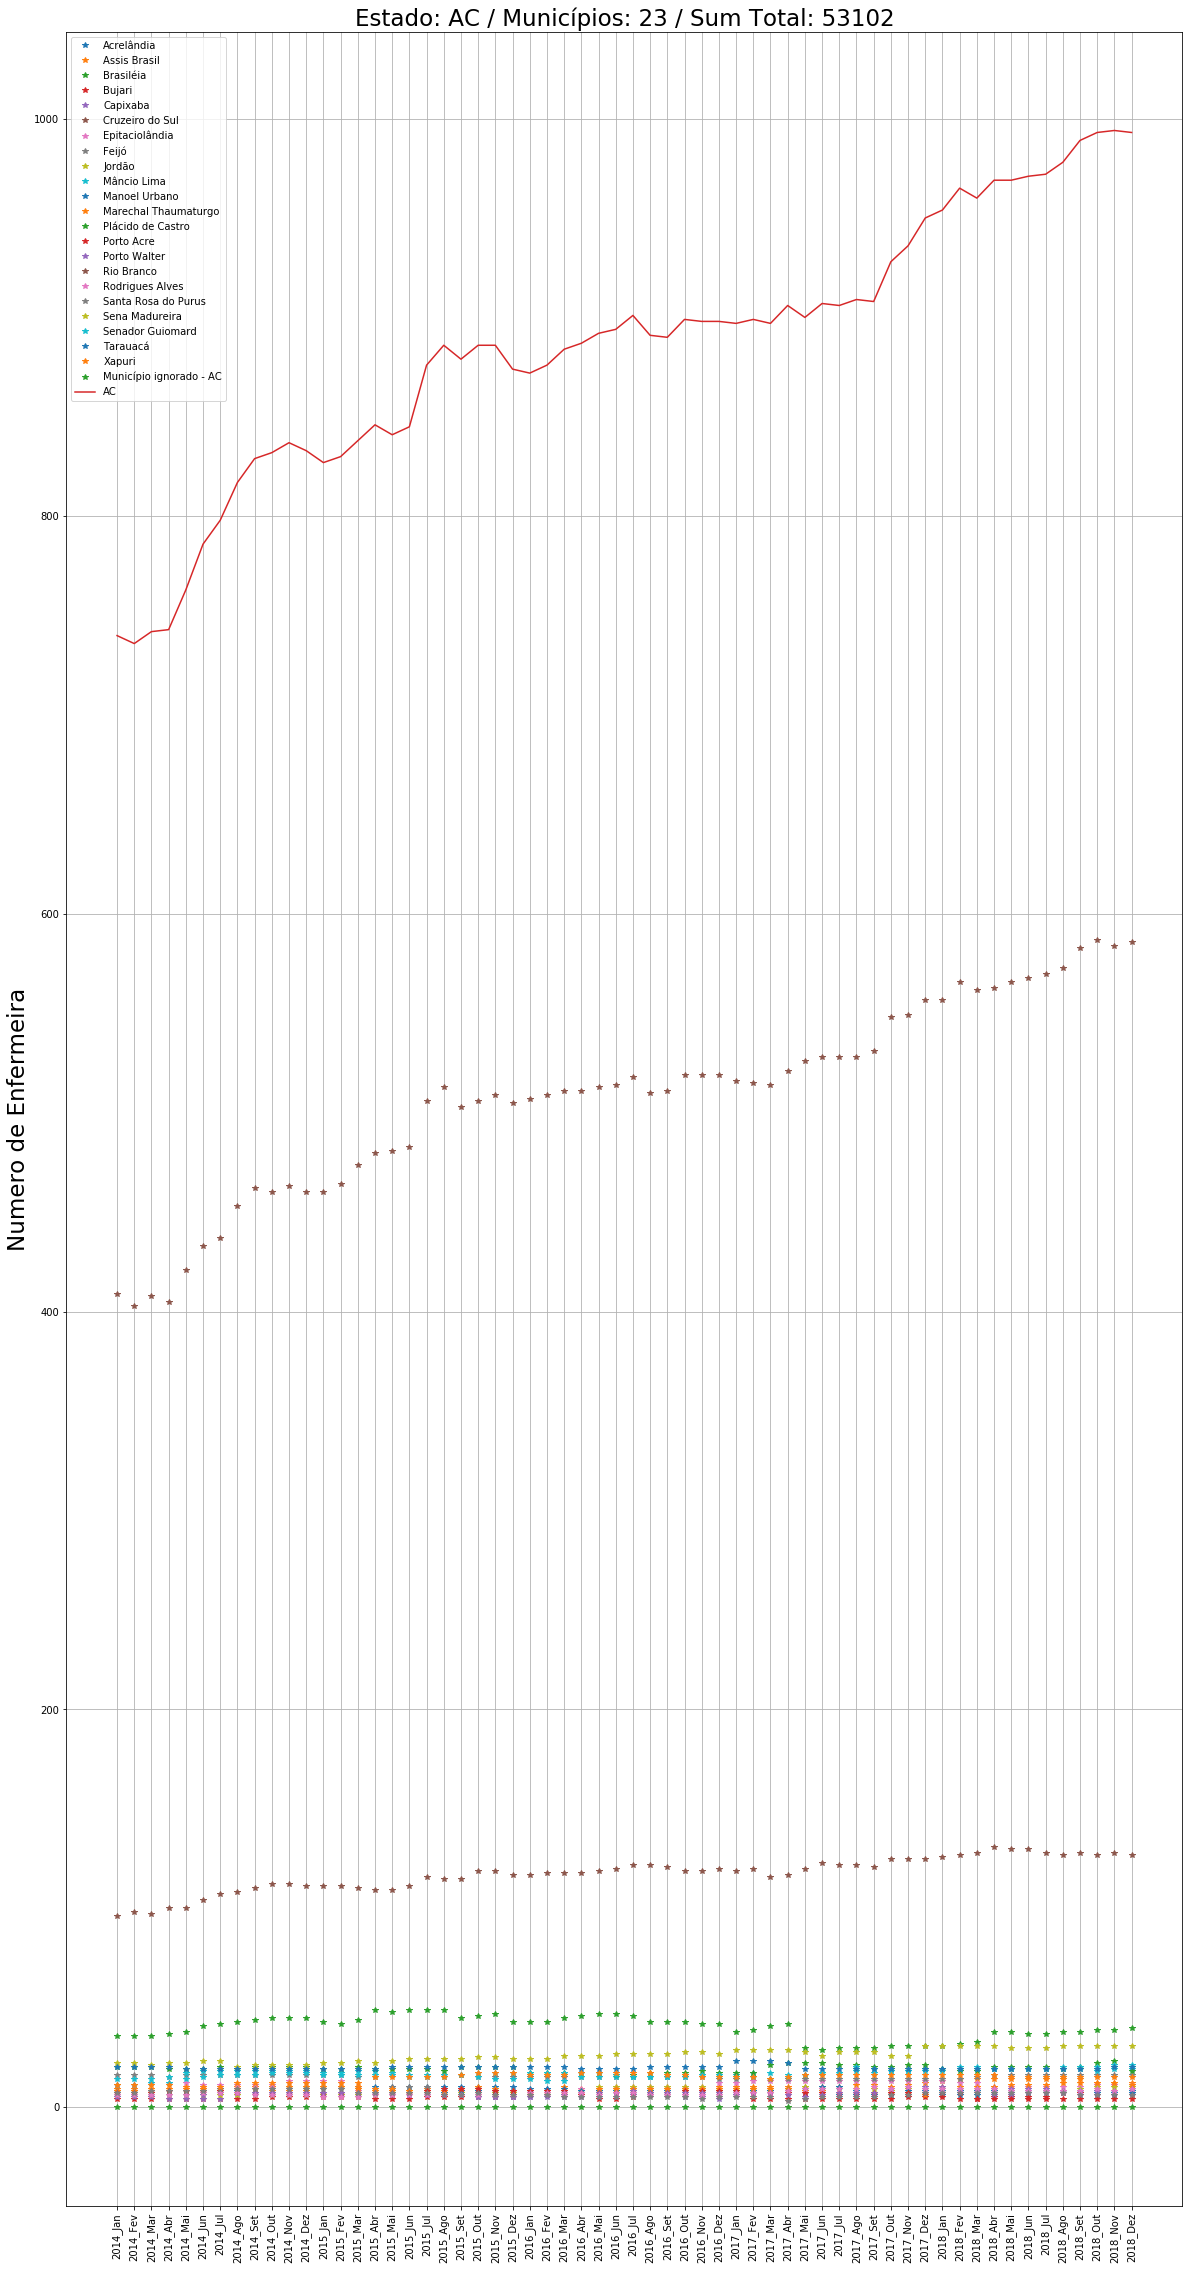

,Estado,Val_Municipio,Município,2014_total_Enfermeira,2014_por_Enfermeira_p_total,2014_Enfermeira_por_cento,2015_total_Enfermeira,2015_por_Enfermeira_p_total,2015_Enfermeira_por_cento,2016_total_Enfermeira,2016_por_Enfermeira_p_total,2016_Enfermeira_por_cento,2017_total_Enfermeira,2017_por_Enfermeira_p_total,2017_Enfermeira_por_cento,2018_total_Enfermeira,2018_por_Enfermeira_p_total,2018_Enfermeira_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,14504,188,0.012962,15836,169,0.010672,17622,201,0.011406,18866,208,0.011025,20918,234,0.011187
1,11.0,110037.0,Alto Alegre dos Parecis,14504,77,0.005309,15836,84,0.005304,17622,81,0.004597,18866,96,0.005089,20918,116,0.005545
2,11.0,110040.0,Alto Paraíso,14504,101,0.006964,15836,114,0.007199,17622,138,0.007831,18866,154,0.008163,20918,109,0.005211
3,11.0,110034.0,Alvorada D'Oeste,14504,121,0.008343,15836,115,0.007262,17622,108,0.006129,18866,132,0.006997,20918,151,0.007219
4,11.0,110002.0,Ariquemes,14504,667,0.045987,15836,779,0.049192,17622,818,0.046419,18866,972,0.051521,20918,1010,0.048284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,9456,259,0.027390,10314,282,0.027341,10682,317,0.029676,10943,337,0.030796,11707,369,0.031520
72,12.0,120045.0,Senador Guiomard,9456,200,0.021151,10314,192,0.018615,10682,193,0.018068,10943,202,0.018459,11707,233,0.019903
73,12.0,120060.0,Tarauacá,9456,232,0.024535,10314,236,0.022882,10682,236,0.022093,10943,243,0.022206,11707,230,0.019646
74,12.0,120070.0,Xapuri,9456,134,0.014171,10314,178,0.017258,10682,195,0.018255,10943,187,0.017089,11707,184,0.015717


In [49]:
data = pd.read_csv('../data/RH- Enfermeiros.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data.copy()
label_s = new_names
name_y_label = 'Enfermeira'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### RH - Médicos

In [ ]:
# data = pd.read_csv('../data/RH- Médicos.csv', sep=';', skiprows=4, encoding='latin1')
# data.columns
# data.index
# dis = False
# aux = data.copy()
# describe_anali(aux,dis)
# aux = data.copy()
# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']
# name_y_label = 'Numero de RH - Médicos'
# plot_RF(aux,new_names,name_y_label)

,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,33.622642,33.773585,34.415094,34.660377,35.924528,36.547170,36.867925,37.056604,37.132075,37.226415,...,45.660377,45.924528,45.754717,45.698113,46.283019,46.528302,46.566038,46.528302,46.622642,45.433962
std,130.212877,130.559689,130.319494,130.186840,132.837791,134.557046,134.696245,134.516287,133.887300,134.095781,...,157.757597,161.150652,160.348767,161.116129,163.918176,165.497688,166.025080,165.889050,166.724696,166.770052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000
50%,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000
75%,11.000000,11.000000,11.000000,11.000000,14.000000,13.000000,14.000000,16.000000,16.000000,14.000000,...,18.000000,17.000000,17.000000,16.000000,16.000000,16.000000,17.000000,17.000000,16.000000,14.000000
max,929.000000,932.000000,923.000000,922.000000,943.000000,955.000000,955.000000,955.000000,951.000000,952.000000,...,1102.000000,1130.000000,1122.000000,1128.000000,1147.000000,1160.000000,1165.000000,1163.000000,1169.000000,1169.000000


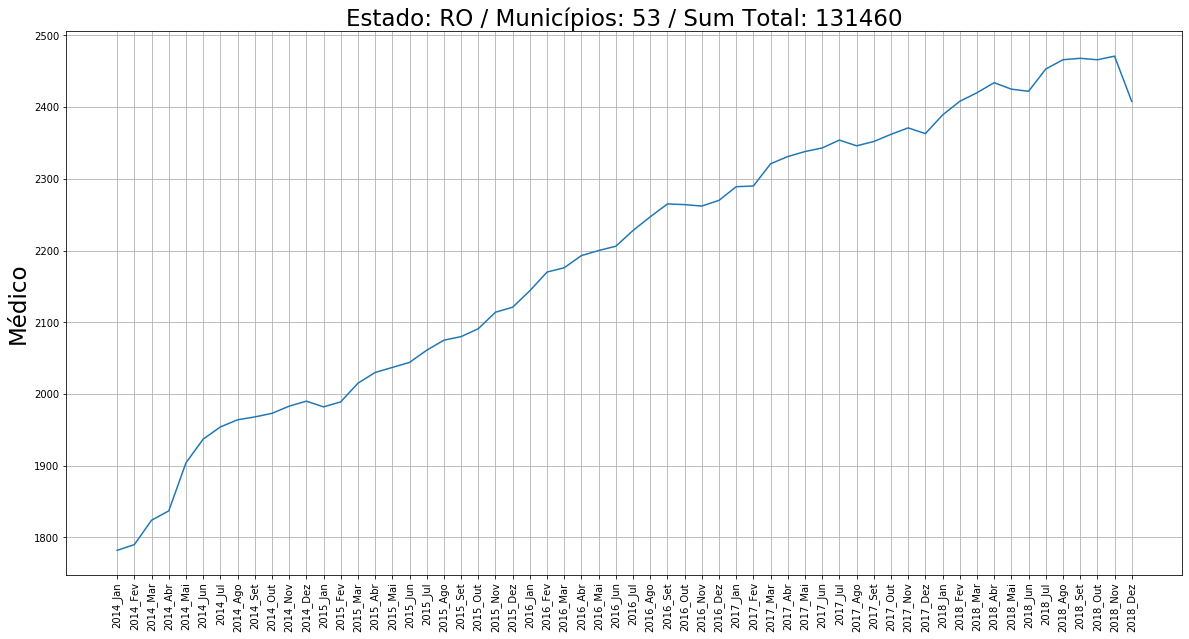

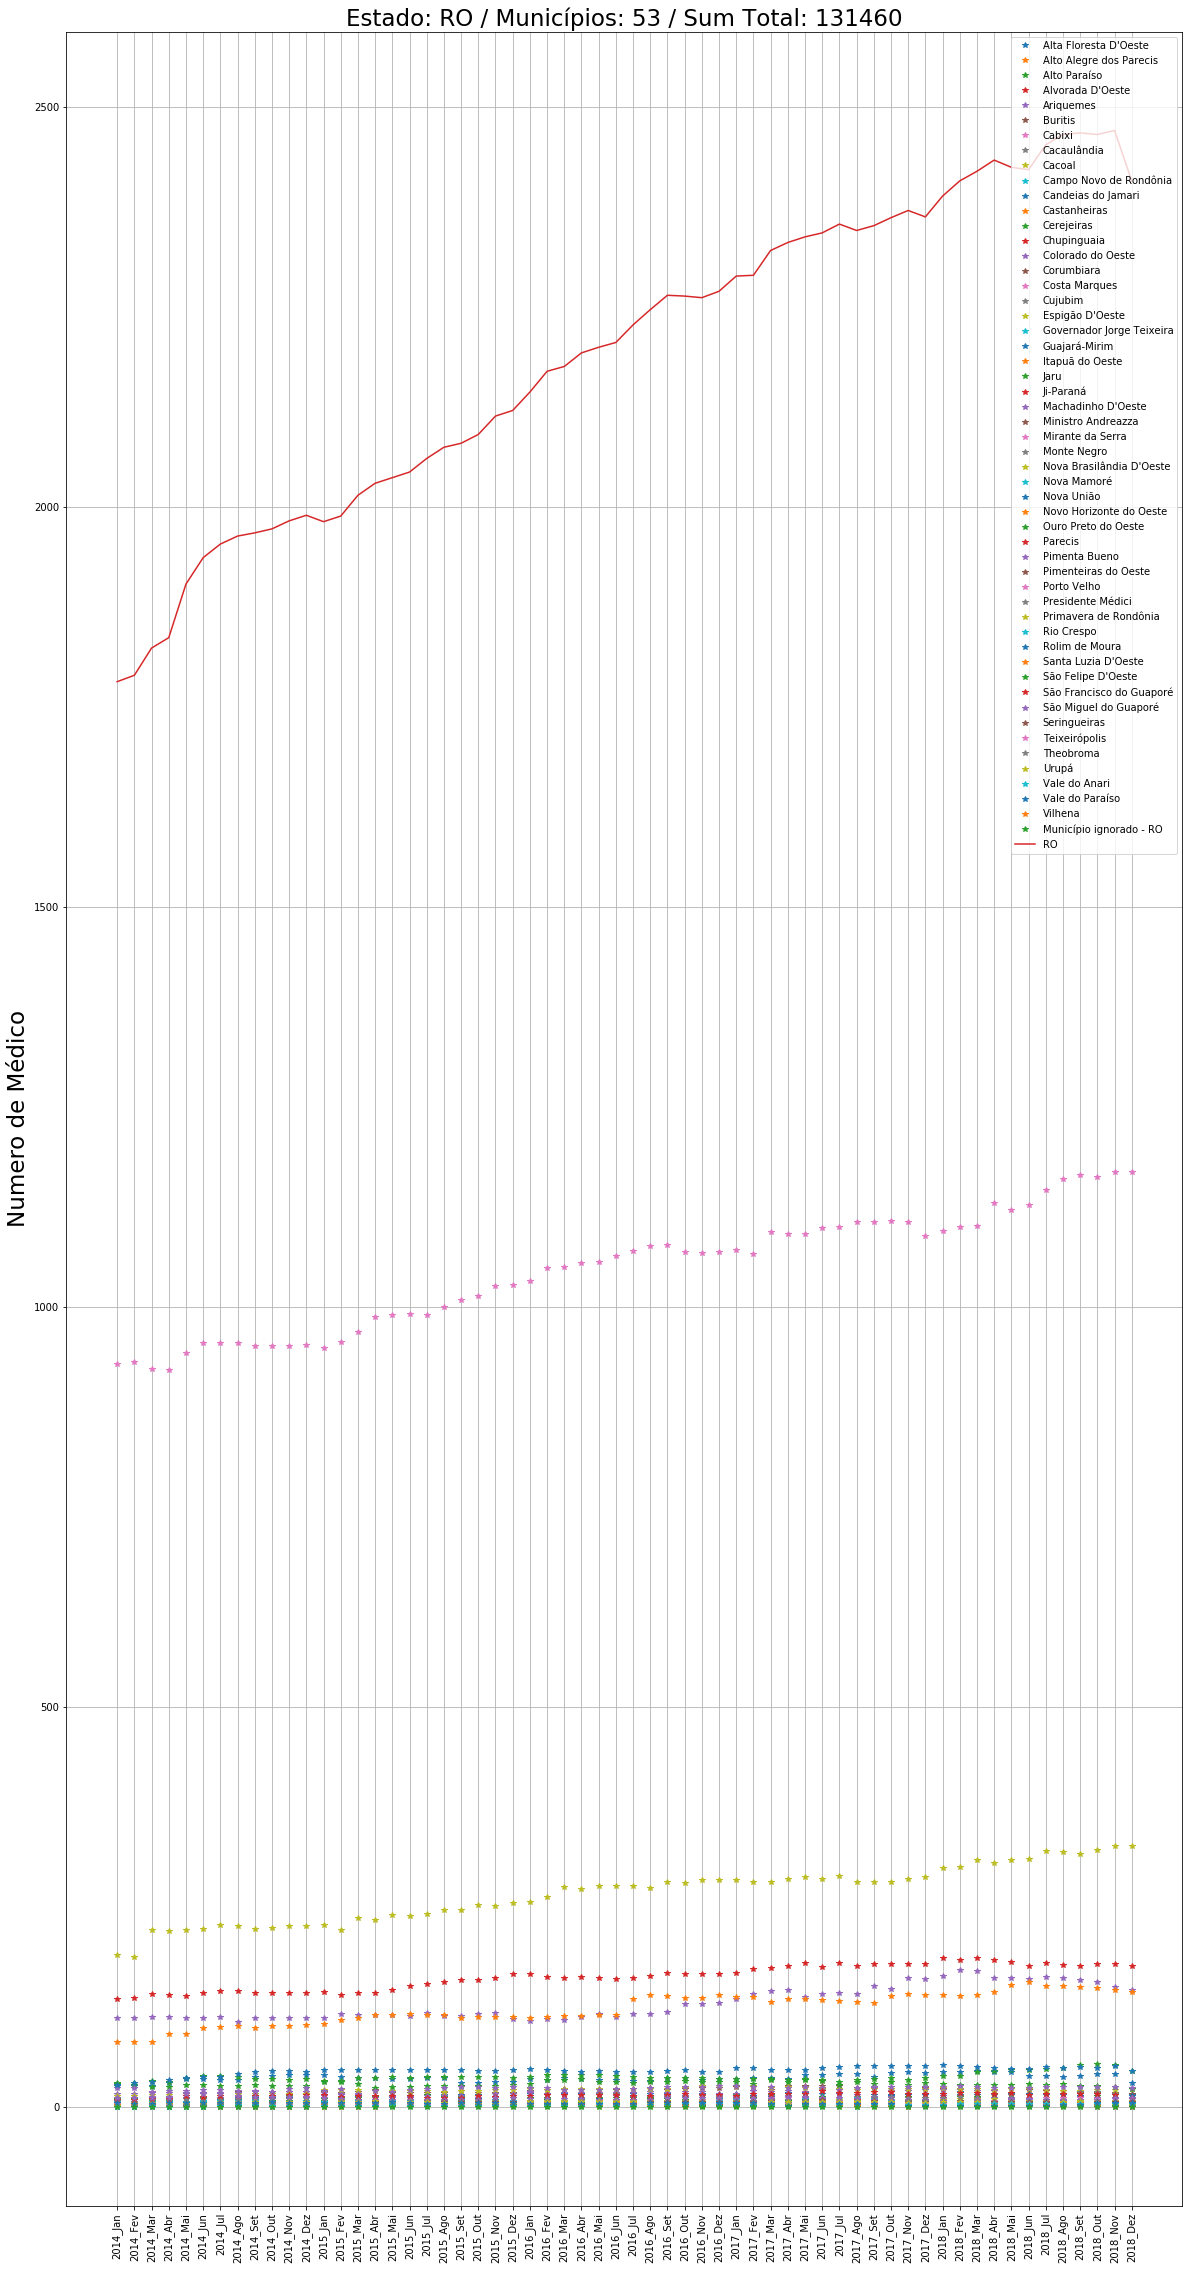

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Estado,Val_Municipio,Município,2014_total_Médico,2014_por_Médico_p_total,2014_Médico_por_cento,2015_total_Médico,2015_por_Médico_p_total,2015_Médico_por_cento,2016_total_Médico,2016_por_Médico_p_total,2016_Médico_por_cento,2017_total_Médico,2017_por_Médico_p_total,2017_Médico_por_cento,2018_total_Médico,2018_por_Médico_p_total,2018_Médico_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,22906,118,0.005151,24639,172,0.006981,26625,199,0.007474,28060,199,0.007092,29230,203,0.006945
1,11.0,110037.0,Alto Alegre dos Parecis,22906,60,0.002619,24639,68,0.002760,26625,87,0.003268,28060,96,0.003421,29230,89,0.003045
2,11.0,110040.0,Alto Paraíso,22906,69,0.003012,24639,97,0.003937,26625,102,0.003831,28060,95,0.003386,29230,81,0.002771
3,11.0,110034.0,Alvorada D'Oeste,22906,45,0.001965,24639,40,0.001623,26625,55,0.002066,28060,89,0.003172,29230,81,0.002771
4,11.0,110002.0,Ariquemes,22906,1337,0.058369,24639,1377,0.055887,26625,1409,0.052920,28060,1753,0.062473,29230,1926,0.065891
5,11.0,110045.0,Buritis,22906,166,0.007247,24639,224,0.009091,26625,272,0.010216,28060,296,0.010549,29230,239,0.008177
6,11.0,110003.0,Cabixi,22906,60,0.002619,24639,60,0.002435,26625,67,0.002516,28060,82,0.002922,29230,70,0.002395
7,11.0,110060.0,Cacaulândia,22906,33,0.001441,24639,30,0.001218,26625,46,0.001728,28060,32,0.001140,29230,28,0.000958
8,11.0,110004.0,Cacoal,22906,2619,0.114337,24639,2896,0.117537,26625,3300,0.123944,28060,3413,0.121632,29230,3762,0.128703
9,11.0,110070.0,Campo Novo de Rondônia,22906,79,0.003449,24639,53,0.002151,26625,67,0.002516,28060,78,0.002780,29230,80,0.002737


,2014_Jan,2014_Fev,2014_Mar,2014_Abr,2014_Mai,2014_Jun,2014_Jul,2014_Ago,2014_Set,2014_Out,...,2018_Mar,2018_Abr,2018_Mai,2018_Jun,2018_Jul,2018_Ago,2018_Set,2018_Out,2018_Nov,2018_Dez
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,36.00000,35.434783,36.000000,36.130435,36.695652,37.304348,37.086957,37.130435,37.652174,37.478261,...,42.521739,42.782609,42.478261,42.434783,42.652174,43.000000,43.173913,43.434783,42.304348,41.217391
std,125.61449,123.117766,122.215532,123.731860,123.206934,125.403144,124.795437,124.340187,125.567660,124.220797,...,143.019347,144.316558,143.029199,144.306752,144.697053,143.254383,142.875869,143.501291,141.485121,142.755340
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.50000,3.000000,3.500000,3.000000,4.500000,4.000000,4.000000,4.000000,4.500000,4.500000,...,5.500000,5.000000,5.000000,4.000000,4.500000,5.500000,5.500000,5.000000,4.500000,4.000000
50%,5.00000,5.000000,5.000000,5.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,7.000000,6.000000
75%,9.50000,9.500000,10.000000,10.000000,10.000000,10.500000,10.500000,10.500000,10.000000,10.000000,...,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,11.500000,12.000000,11.000000,10.500000
max,607.00000,595.000000,591.000000,598.000000,596.000000,607.000000,604.000000,602.000000,607.000000,600.000000,...,690.000000,697.000000,691.000000,697.000000,699.000000,692.000000,690.000000,693.000000,683.000000,689.000000


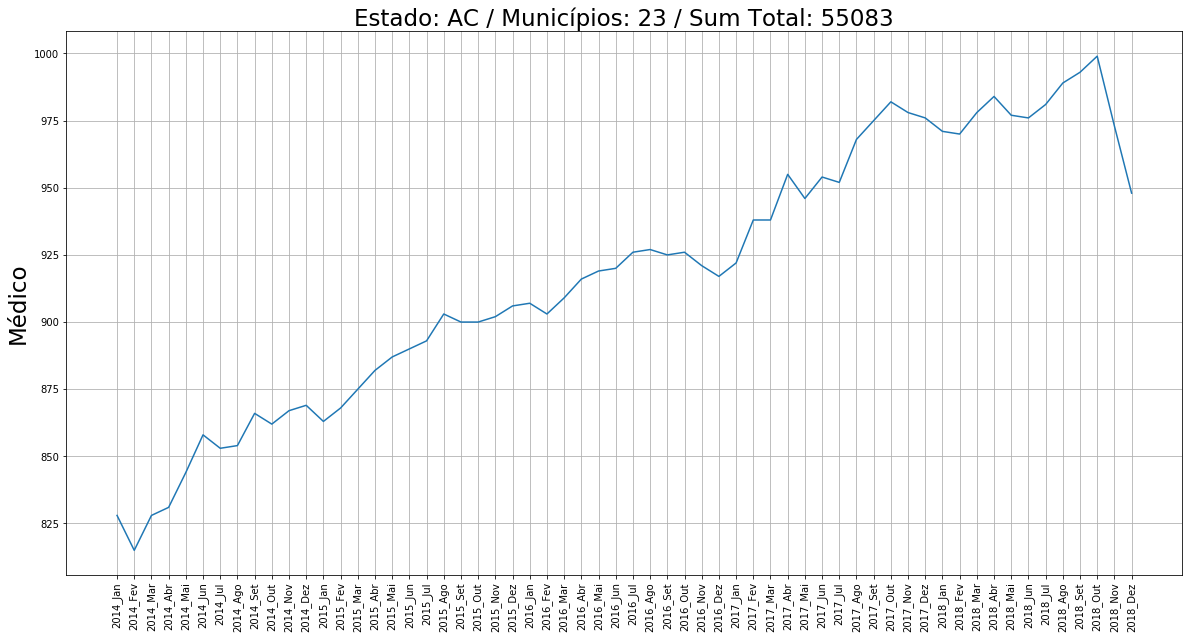

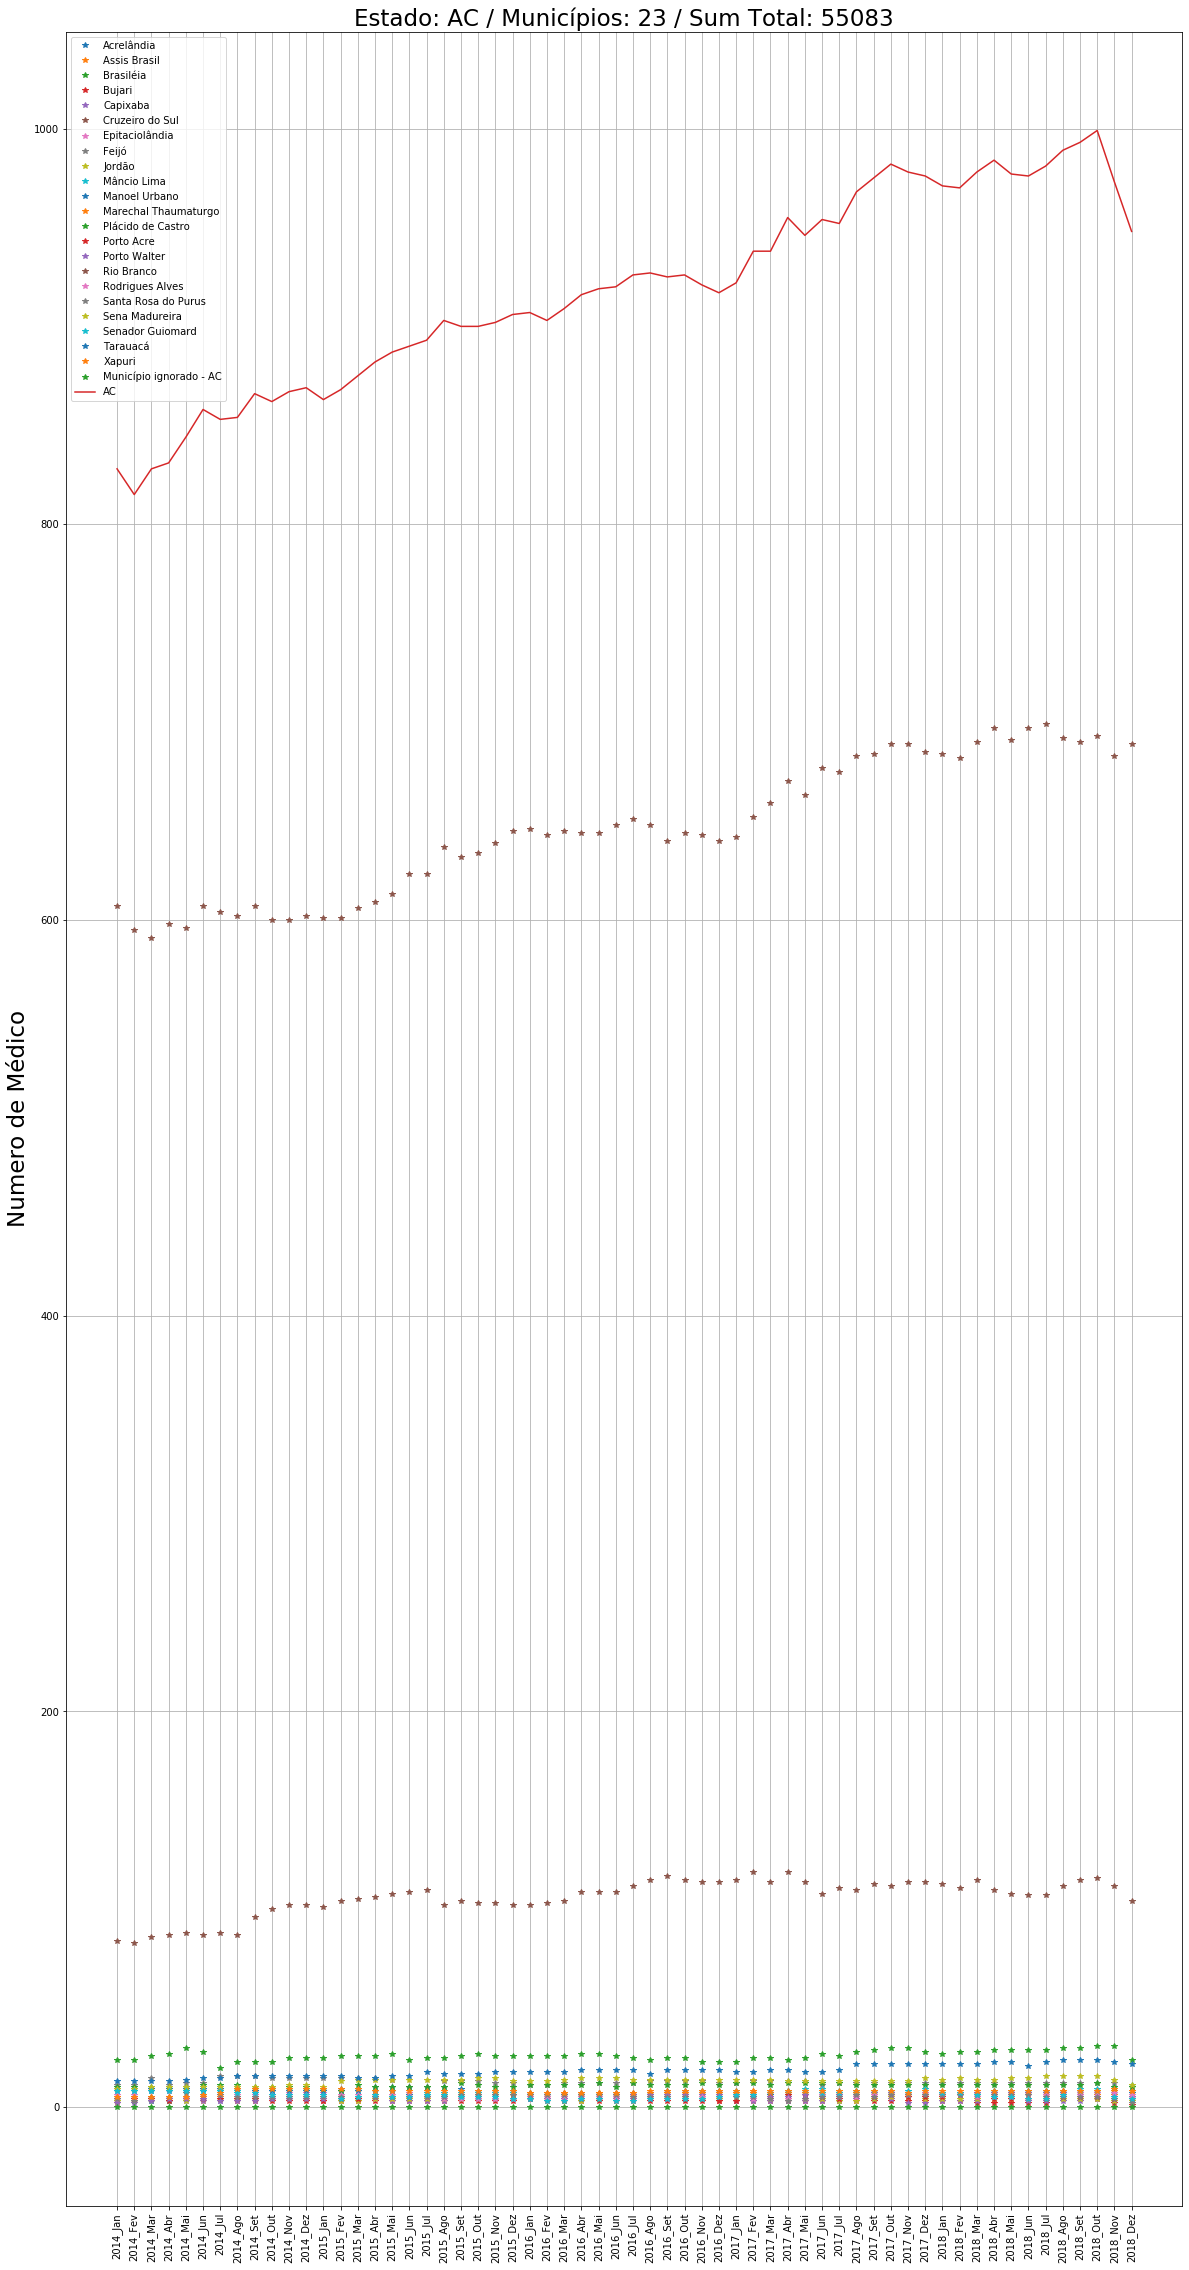

,Estado,Val_Municipio,Município,2014_total_Médico,2014_por_Médico_p_total,2014_Médico_por_cento,2015_total_Médico,2015_por_Médico_p_total,2015_Médico_por_cento,2016_total_Médico,2016_por_Médico_p_total,2016_Médico_por_cento,2017_total_Médico,2017_por_Médico_p_total,2017_Médico_por_cento,2018_total_Médico,2018_por_Médico_p_total,2018_Médico_por_cento
0,11.0,110001.0,Alta Floresta D'Oeste,22906,118,0.005151,24639,172,0.006981,26625,199,0.007474,28060,199,0.007092,29230,203,0.006945
1,11.0,110037.0,Alto Alegre dos Parecis,22906,60,0.002619,24639,68,0.002760,26625,87,0.003268,28060,96,0.003421,29230,89,0.003045
2,11.0,110040.0,Alto Paraíso,22906,69,0.003012,24639,97,0.003937,26625,102,0.003831,28060,95,0.003386,29230,81,0.002771
3,11.0,110034.0,Alvorada D'Oeste,22906,45,0.001965,24639,40,0.001623,26625,55,0.002066,28060,89,0.003172,29230,81,0.002771
4,11.0,110002.0,Ariquemes,22906,1337,0.058369,24639,1377,0.055887,26625,1409,0.052920,28060,1753,0.062473,29230,1926,0.065891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12.0,120050.0,Sena Madureira,10175,120,0.011794,10669,164,0.015372,11016,169,0.015341,11484,161,0.014020,11739,176,0.014993
72,12.0,120045.0,Senador Guiomard,10175,88,0.008649,10669,62,0.005811,11016,45,0.004085,11484,91,0.007924,11739,69,0.005878
73,12.0,120060.0,Tarauacá,10175,176,0.017297,10669,199,0.018652,11016,223,0.020243,11484,239,0.020812,11739,273,0.023256
74,12.0,120070.0,Xapuri,10175,83,0.008157,10669,99,0.009279,11016,89,0.008079,11484,95,0.008272,11739,97,0.008263


In [50]:
data = pd.read_csv('../data/RH- Médicos.csv', sep=';', skiprows=4, encoding='latin1')

new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
             '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
             '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
             '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
             '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

dataframe = data.copy()
label_s = new_names
name_y_label = 'Médico'

df_Fim_todos = new_features_and_plot(dataframe,label_s,name_y_label)

### New Data

In [ ]:
import pandas as pd
def read_pop_csv(key):
    pop_csv = pd.read_csv(r'../data/dados_pop_invt_saude/pop_' + str(key) + '.csv')
    pop_csv = pop_csv.drop(columns=['Unnamed: 0'])
    return(pop_csv)

p_0 = read_pop_csv(2014); p_1 = read_pop_csv(2015); p_2 = read_pop_csv(2016); p_3 = read_pop_csv(2017); p_4 = read_pop_csv(2018)


#Taxa de Crescimento Dict
dict_tax_cresc={'11': 1.24, '12': 2.77, '13': 2.15,'14': 3.36, '15': 2.05, '16': 3.44, '17': 1.80, '21': 1.52, '22': 0.93,
                '23': 1.29, '24': 1.33, '25': 0.90,'26': 1.06, '27': 1.01, '28': 1.49, '29': 0.70, '31': 0.91, '32': 1.27,
                '33': 1.06, '35': 1.08, '41': 0.88,'42': 1.55, '43': 0.49, '50': 1.66, '51': 1.94, '52': 1.84, '53': 2.25}


## Lixo

In [ ]:
# data_leitos_internacao = pd.read_csv('../data/RF- Leitos de Internação.csv', sep=';', skiprows=3, encoding='latin1')

# new_names = ['2014_Jan', '2014_Fev', '2014_Mar', '2014_Abr', '2014_Mai', '2014_Jun', '2014_Jul', '2014_Ago', '2014_Set', '2014_Out', '2014_Nov', '2014_Dez',
#              '2015_Jan', '2015_Fev', '2015_Mar', '2015_Abr', '2015_Mai', '2015_Jun', '2015_Jul', '2015_Ago', '2015_Set', '2015_Out', '2015_Nov', '2015_Dez',
#              '2016_Jan', '2016_Fev', '2016_Mar', '2016_Abr', '2016_Mai', '2016_Jun', '2016_Jul', '2016_Ago', '2016_Set', '2016_Out', '2016_Nov', '2016_Dez',
#              '2017_Jan', '2017_Fev', '2017_Mar', '2017_Abr', '2017_Mai', '2017_Jun', '2017_Jul', '2017_Ago', '2017_Set', '2017_Out', '2017_Nov', '2017_Dez',
#              '2018_Jan', '2018_Fev', '2018_Mar', '2018_Abr', '2018_Mai', '2018_Jun', '2018_Jul', '2018_Ago', '2018_Set', '2018_Out', '2018_Nov', '2018_Dez']

# dataframe = data_leitos_internacao.copy()
# label_s = new_names


# ###INIT FUNCTION Merge and New_Information

# # def new_features(dataframe,label_s,name_y_label):    
# aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
# dataframe["Município"]= aux_colum[1] 
# dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 

# dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

# #Convert int
# dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
# dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

# #UF = 11,12,13,14,15,16,17,21,22,23,24,25,26,27,28,29,31,32,33,35,41,42,43,50,51,52,53
# #UF_sig = 'RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF'
    
# #Toy
# UF = 11,12
# UF_sig = 'RO','AC'
# state_dict = dict(zip(UF, UF_sig))
# df_Fim_todos = pd.DataFrame()
# unico = 1 #act one time

# for UF_num, Uf_sig in state_dict.items():
#     dataframe_aux = dataframe.copy()
    
#     #insert calculates
    
#     dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]
#     #display(est_hosp5.describe())
#     dataframe_aux = dataframe_aux.replace('-',0)
#     dataframe_aux = dataframe_aux.replace(np.NaN,0)
        
#     values = dataframe_aux.values
        
#     values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
#     num_hosp = values_np.shape[0]

#     #Plot Evolution State
#     df2 = pd.DataFrame(values_np, columns= label_s)
#     display(df2.describe())
    
#     df_sum_anos = df2.copy()
    
#     val = 0
#     ano_seq = 0
#     anos = ['2014', '2015', '2016', '2017', '2018']
#     df_Fim = dataframe_aux[['Estado','Val_Municipio','Município']]
    
#     for ano in anos:
#         nn_anos = new_names[val:val+12]
#         val = val+12
#         # Sei no estado o quanto tem...
#         df_Fim[ano + '_total']= df_sum_anos[nn_anos].sum(axis=1).sum()
#         df_Fim[ano + '_por_municipio_p_total'] = df_sum_anos[nn_anos].sum(axis=1).values
#         df_Fim[ano + '_por_municipio_por_cento'] = df_Fim[ano + '_por_municipio_p_total']  / df_Fim[ano + '_total']
#         print(df_Fim.shape)
#     df_Fim_todos = pd.concat([df_Fim_todos, df_Fim])
        
        

In [ ]:
# aux = data_leitos_internacao.copy()
# name_y_label = 'Numero de Leitos'
# dataframe = aux
# label_s = new_names
# name_y_label 
# aux_colum = dataframe["Município"].str.split(" ", n = 1, expand = True)
# dataframe["Município"]= aux_colum[1] 
# dataframe.insert(0, "Val_Municipio", aux_colum[0].values, True) 
# dataframe.insert(0, "Estado",  dataframe["Val_Municipio"].str[0:2], True) 

# #Convert int
# dataframe["Estado"] = dataframe["Estado"].apply(pd.to_numeric, errors='coerce')
# dataframe["Val_Municipio"] = dataframe["Val_Municipio"].apply(pd.to_numeric, errors='coerce')

# UF = 11,12
# UF_sig = 'RO','AC'
# state_dict = dict(zip(UF, UF_sig))

# for UF_num, Uf_sig in state_dict.items():
#     dataframe_aux = dataframe.copy()
#     dataframe_aux = dataframe_aux[dataframe_aux['Estado']== UF_num]

#     #display(est_hosp5.describe())
#     dataframe_aux = dataframe_aux.replace('-',0)
#     dataframe_aux = dataframe_aux.replace(np.NaN,0)
#     values = dataframe_aux.values
#     values_np = dataframe_aux.values[:,3:values.shape[1]].astype(int)
    
#     df2 = pd.DataFrame(values_np, columns= new_names)
#     display(df2.describe())
#     out = df2.sum()
#     plt.plot(out.index,out.values)
    
#     tag = dataframe_aux['Município'].values

#     num_hosp = values_np.shape[0]

#     plt.figure(figsize=(20, 40))
#     for val in range(0,num_hosp):
#         plt.plot(label_s, values_np[val,:],'*', label = str(tag[val]))
#     plt.title('Estado: %s / Municípios: %s' %(Uf_sig, num_hosp),fontsize=23)
#     plt.xticks(rotation=90)
#     plt.grid(True)
#     plt.ylabel(name_y_label,fontsize=23)
#     plt.legend()
#     plt.show()

In [ ]:
# df2 = pd.DataFrame(values_np, columns= new_names)
# df2.describe()
# out = df2.sum()
# plt.plot(out.index,out.values)

In [ ]:
# out.sum()